In [1]:
import pandas as pd
import statsmodels.api as sm
import numpy as np

data = pd.read_csv("fraserDataWithRGDPPC.csv", 
                   index_col=[0,1],
                  parse_dates = True)

In [2]:
# Changes the years to start from earliest to latest
years = np.array(sorted(list(set(data.index.get_level_values("Year")))))

# Creates the data range
years = pd.date_range(years[0], years[-2], freq = "AS")

# Creates countries
countries = sorted(list(set(data.index.get_level_values("ISO_Code"))))

# Names the indeces
index_names = list(data.index.names)
multi_index = pd.MultiIndex.from_product([countries, 
                                          years[:-1]], 
                                         names =data.index.names)

In [3]:
data = data.reindex(multi_index)

In [4]:
# Calculates the log value by the RGDP Per Capita column
data['RGDP Per Capita Log Value'] = np.log(data["RGDP Per Capita"])

In [5]:
# Makes sure lag variables are sorted correctly
# Chooses RGDP Per Capita Log Value from ISO_Code
# .shift moves values down one
data["RGDP Per Capita Lag"] = data.groupby("ISO_Code")["RGDP Per Capita Log Value"].shift()

In [6]:
y_var = ["RGDP Per Capita"]
x_vars = ["RGDP Per Capita Log Value",
         "Size of Government",
         "Legal System & Property Rights",
         "Sound Money",
         "Freedom to trade internationally",
         "Regulation"]
# Creates dataframe for the variables
reg_vars = y_var + x_vars
reg_data = data[reg_vars].dropna()
reg_data

RGDP Per Capita  RGDP Per Capita Log Value  \
ISO_Code Year                                                     
AGO      2005-01-01           3364.0                   8.120886   
         2006-01-01           4558.0                   8.424639   
         2007-01-01           5314.0                   8.578100   
         2008-01-01           6318.0                   8.751158   
         2009-01-01           5212.0                   8.558719   
...                              ...                        ...   
ZWE      2011-01-01           1515.0                   7.323171   
         2012-01-01           1623.0                   7.392032   
         2013-01-01           1801.0                   7.496097   
         2014-01-01           1797.0                   7.493874   
         2015-01-01           1759.0                   7.472501   

                     Size of Government  Legal System & Property Rights  \
ISO_Code Year                                                             
AGO      2005-01-01            4.652865                        3.148805   
         2006-01-01            5.342913                        3.546463   
         2007-01-01            5.239228                        3.569182   
         2008-01-01            5.307379                        3.654098   
         2009-01-01            7.104953                        3.622792   
...                                 ...                             ...   
ZWE      2011-01-01            6.424630                        3.943725   
         2012-01-01            6.670469                        4.013004   
         2013-01-01            6.325105                        3.575827   
         2014-01-01            6.433165                        3.615584   
         2015-01-01            6.402772                        3.820360   

                     Sound Money  Freedom to trade internationally  Regulation  
ISO_Code Year                                                                   
AGO      2005-01-01     1.262168                          6.218266    4.729310  
         2006-01-01     4.061198                          6.158949    5.306135  
         2007-01-01     4.453327                          6.115462    5.524626  
         2008-01-01     5.032836                          5.687976    5.221726  
         2009-01-01     5.238259                          5.811844    5.011598  
...                          ...                               ...         ...  
ZWE      2011-01-01     4.109198                          5.366773    4.372878  
         2012-01-01     5.378742                          5.132305    3.661438  
         2013-01-01     6.895530                          5.589087    3.848068  
         2014-01-01     7.966798                          5.909121    3.987721  
         2015-01-01     8.180178                          5.679719    6.643620  

[2579 rows x 7 columns]

In [7]:
reg_data.corr().round(2)

RGDP Per Capita  RGDP Per Capita Log Value  \
RGDP Per Capita                              1.00                       0.83   
RGDP Per Capita Log Value                    0.83                       1.00   
Size of Government                          -0.15                      -0.14   
Legal System & Property Rights               0.68                       0.75   
Sound Money                                  0.44                       0.51   
Freedom to trade internationally             0.49                       0.59   
Regulation                                   0.50                       0.52   

                                  Size of Government  \
RGDP Per Capita                                -0.15   
RGDP Per Capita Log Value                      -0.14   
Size of Government                              1.00   
Legal System & Property Rights                 -0.10   
Sound Money                                     0.20   
Freedom to trade internationally                0.24   
Regulation                                      0.21   

                                  Legal System & Property Rights  Sound Money  \
RGDP Per Capita                                             0.68         0.44   
RGDP Per Capita Log Value                                   0.75         0.51   
Size of Government                                         -0.10         0.20   
Legal System & Property Rights                              1.00         0.52   
Sound Money                                                 0.52         1.00   
Freedom to trade internationally                            0.63         0.68   
Regulation                                                  0.59         0.60   

                                  Freedom to trade internationally  Regulation  
RGDP Per Capita                                               0.49        0.50  
RGDP Per Capita Log Value                                     0.59        0.52  
Size of Government                                            0.24        0.21  
Legal System & Property Rights                                0.63        0.59  
Sound Money                                                   0.68        0.60  
Freedom to trade internationally                              1.00        0.65  
Regulation                                                    0.65        1.00

In [8]:
reg_data.describe().round(2)

RGDP Per Capita  RGDP Per Capita Log Value  Size of Government  \
count          2579.00                    2579.00             2579.00   
mean          15913.65                       9.06                6.35   
std           17204.60                       1.21                1.24   
min             432.00                       6.07                1.57   
25%            3472.50                       8.15                5.52   
50%           10032.00                       9.21                6.42   
75%           23393.50                      10.06                7.18   
max          156144.00                      11.96                9.51   

       Legal System & Property Rights  Sound Money  \
count                         2579.00      2579.00   
mean                             5.23         7.76   
std                              1.74         1.85   
min                              0.99         0.00   
25%                              3.96         6.74   
50%                              5.17         8.11   
75%                              6.35         9.32   
max                              9.14         9.89   

       Freedom to trade internationally  Regulation  
count                           2579.00     2579.00  
mean                               6.90        6.66  
std                                1.52        1.17  
min                                0.00        2.10  
25%                                6.18        5.93  
50%                                7.15        6.75  
75%                                7.98        7.48  
max                               10.00        9.44

In [9]:
y = reg_data[y_var]
X = reg_data[x_vars]
X["Constant"] = 1
results = sm.OLS(y, X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        RGDP Per Capita   R-squared:                       0.712
Model:                            OLS   Adj. R-squared:                  0.711
Method:                 Least Squares   F-statistic:                     1060.
Date:                Tue, 26 Oct 2021   Prob (F-statistic):               0.00
Time:                        16:43:18   Log-Likelihood:                -27207.
No. Observations:                2579   AIC:                         5.443e+04
Df Residuals:                    2572   BIC:                         5.447e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
RGDP Per Capita Log Value         1.048e+04    240.436     43.577      0.000       1e+04    1.09e+04
Size of Government                -564.2162    169.720     -3.324      0.001    -897.018    -231.414
Legal System & Property Rights     982.9198    176.282      5.576      0.000     637.250    1328.590
Sound Money                         -9.0789    141.596     -0.064      0.949    -286.732     268.574
Freedom to trade internationally  -835.3789    198.009     -4.219      0.000   -1223.652    -447.106
Regulation                        1742.2838    225.876      7.713      0.000    1299.366    2185.202
Constant                         -8.636e+04   1979.677    -43.624      0.000   -9.02e+04   -8.25e+04
==============================================================================
Omnibus:                     2283.913   Durbin-Watson:                   0.214
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           115002.531
Skew:                           3.992   Prob(JB):                         0.00
Kurtosis:                      34.725   Cond. No.                         193.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
# Creates the predictor
predictor = results.predict()
reg_data["RGDP Per Capita Log Value" + " Predictor"] = predictor

In [11]:
# Renaming y_var[0] for readability
name = "RGDP Per Capita Log Value"
y_hat = reg_data[name + " Predictor"]
y_mean = reg_data[name].mean()
y = reg_data[name]

# Creates a residuals column
reg_data["Residuals"] = y_hat.sub(y_mean)

(array([-30000., -20000., -10000.,      0.,  10000.,  20000.,  30000.,
         40000.,  50000.,  60000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

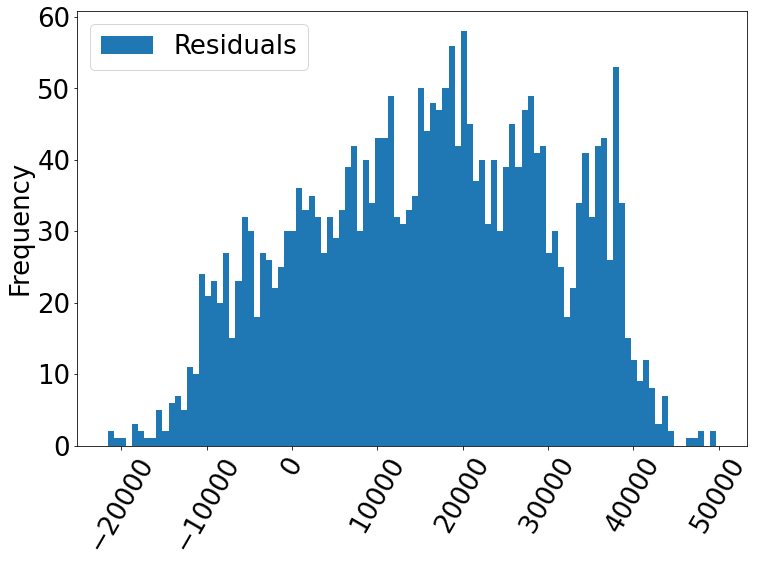

In [12]:
import matplotlib.pyplot as plt
plt.rcParams.update({"font.size":26})
fig, ax = plt.subplots(figsize = (12,8))
reg_data[["Residuals"]].plot.hist(bins = 100, 
                                  ax = ax)
plt.xticks(rotation=60)

In [13]:
y_var = ["RGDP Per Capita Log Value"]
x_vars = ["RGDP Per Capita",
          "Size of Government", 
          "Legal System & Property Rights", 
          "Sound Money",
          "Freedom to trade internationally",
          "Regulation"]

y = reg_data[y_var]
X = reg_data[x_vars]
X["Constant"] = 1
results = sm.OLS(y, X).fit()
reg_data["Predictor"] = results.predict()

<ipython-input-13-cd237a2b410f>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Constant"] = 1


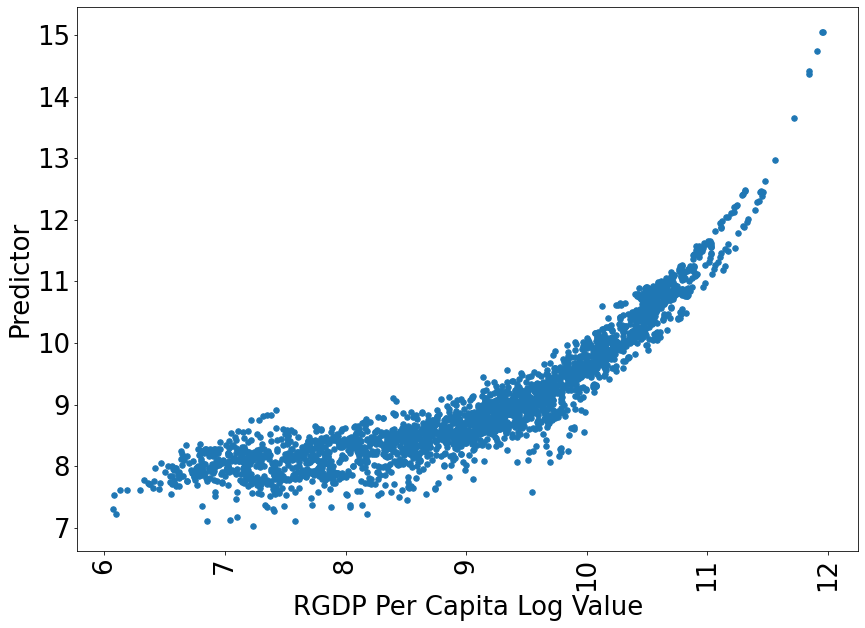

In [14]:
# Create a scatter plot for RGDP Per Capita by Predictor
fig, ax = plt.subplots(figsize = (14,10))
reg_data.plot.scatter(x = y_var[0],
                 y = "Predictor", 
                 s = 30, ax = ax)
plt.xticks(rotation=90)
plt.show()
plt.close()

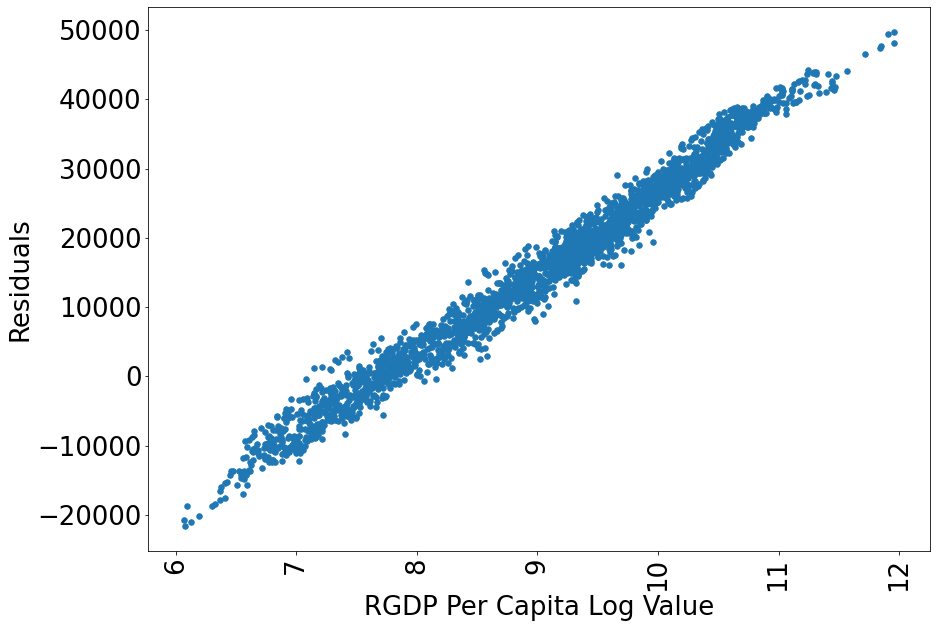

In [15]:
# Create a scatter plot for RGDP Per Capita by Residual
fig, ax = plt.subplots(figsize = (14,10))
reg_data.plot.scatter(x = y_var[0],
                 y = "Residuals", 
                 s = 30, ax = ax)
plt.xticks(rotation=90)
plt.show()
plt.close()

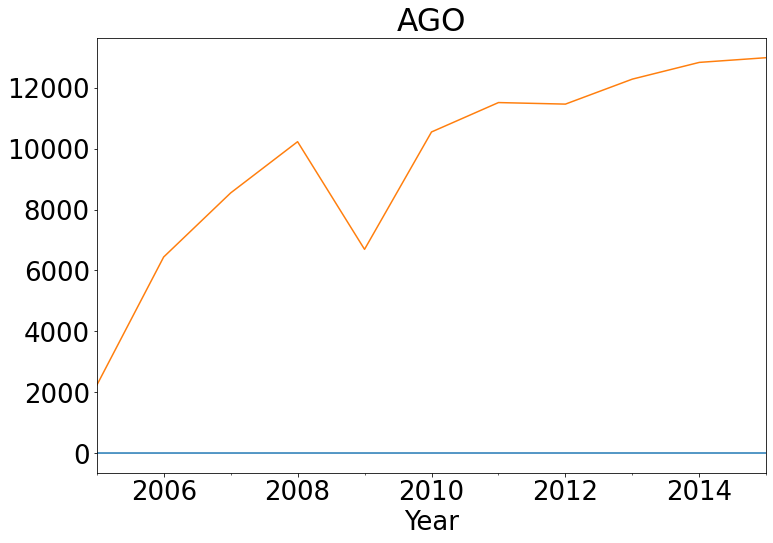

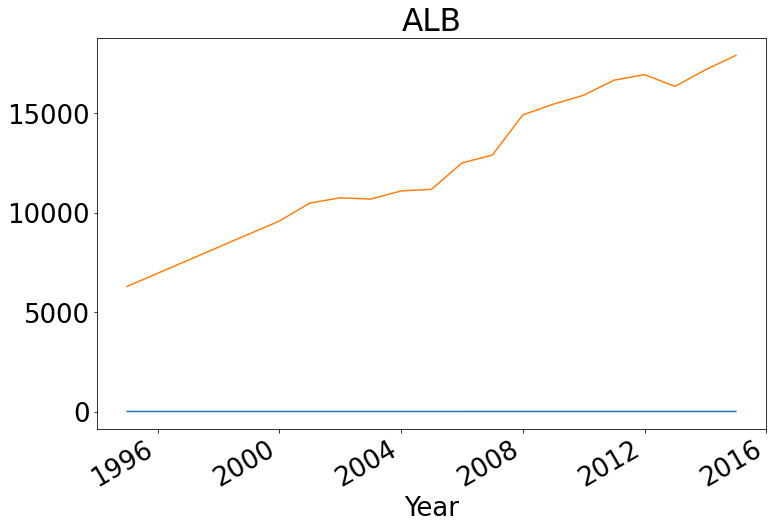

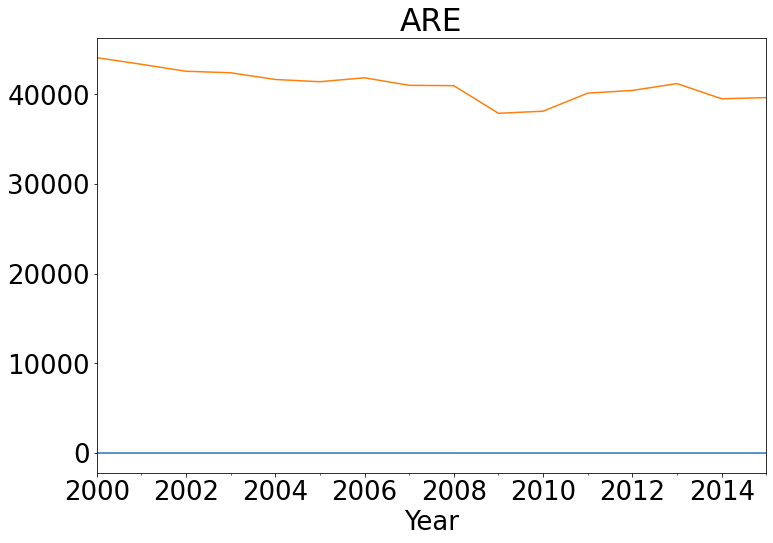

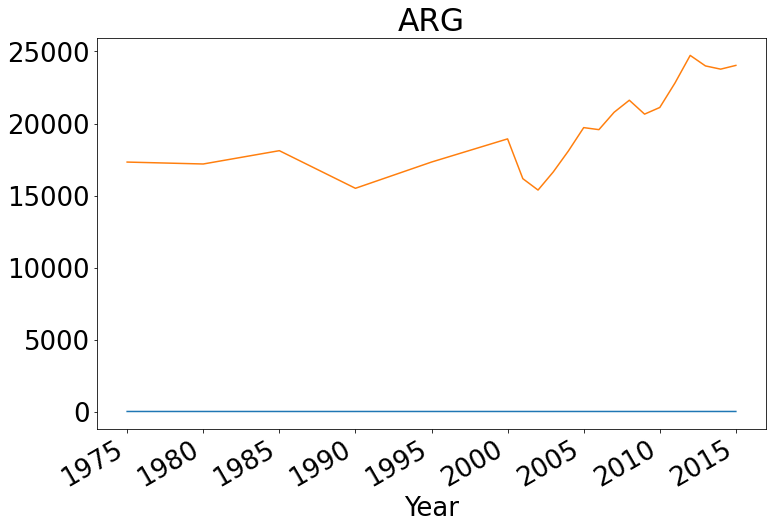

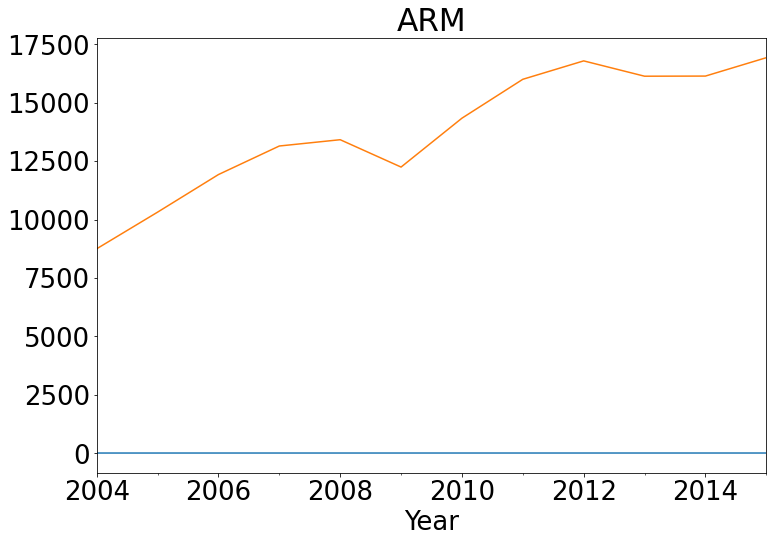

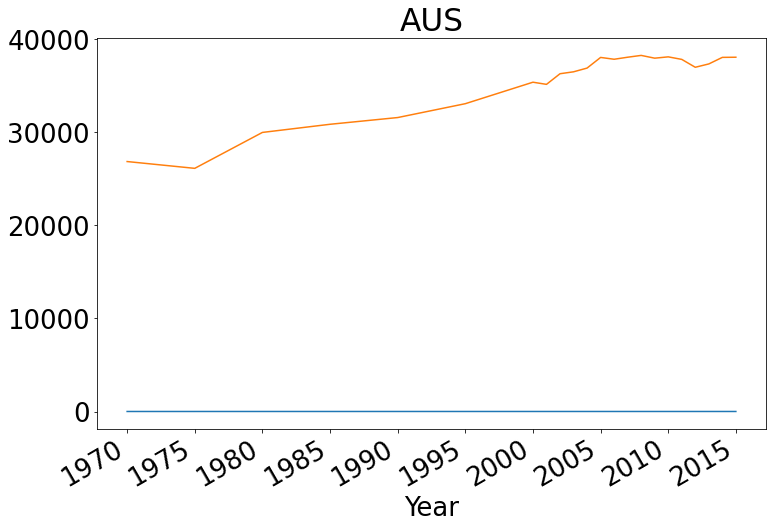

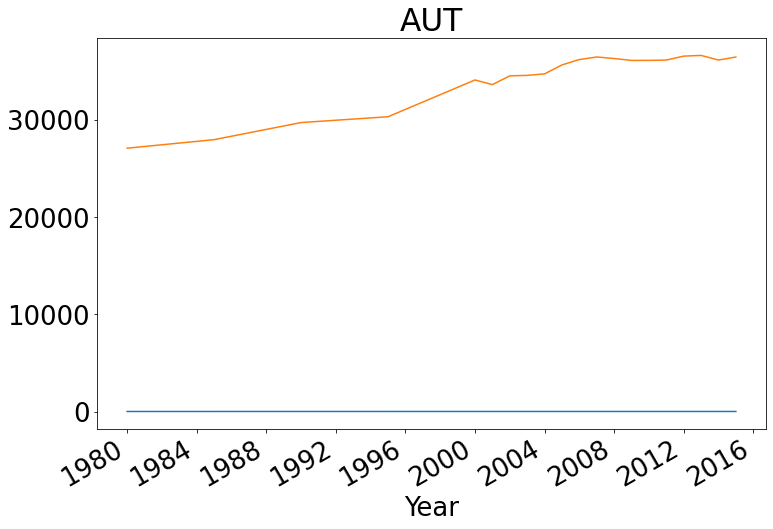

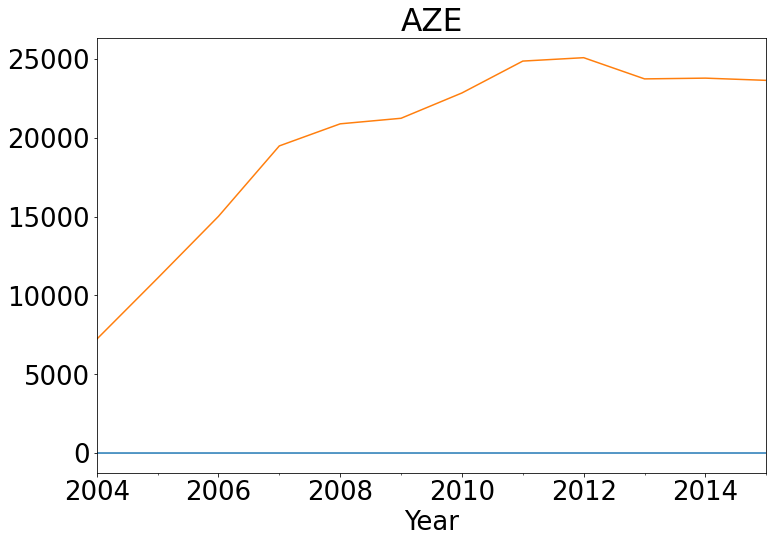

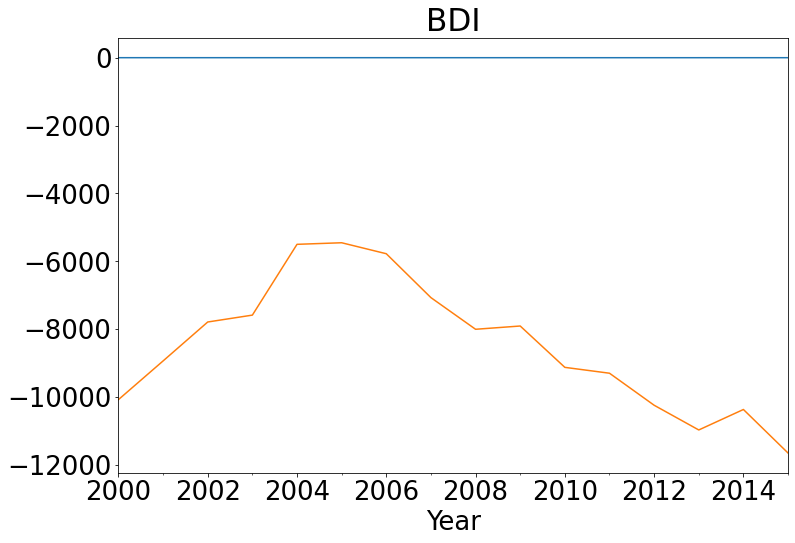

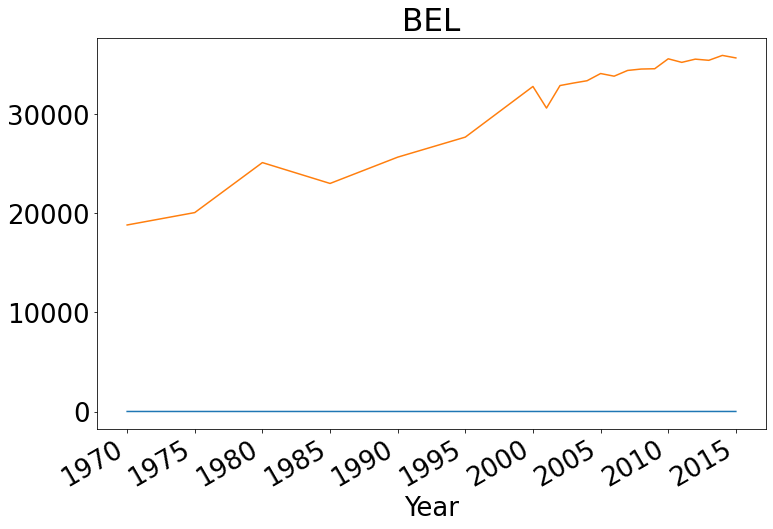

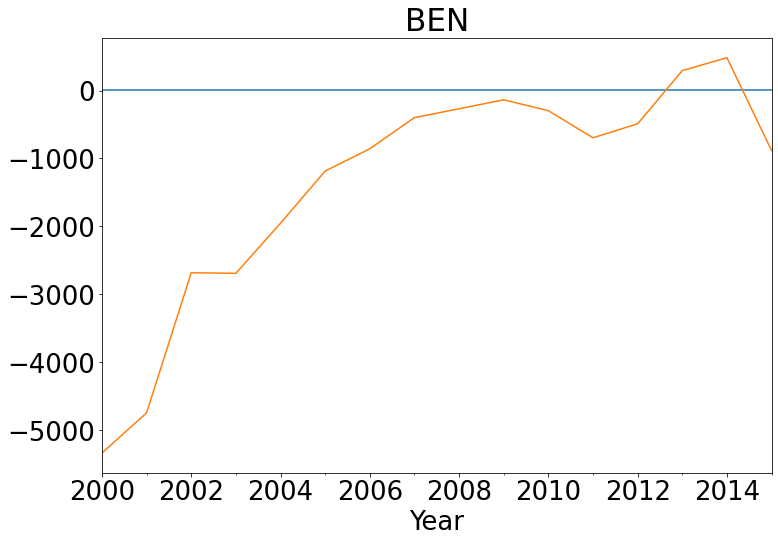

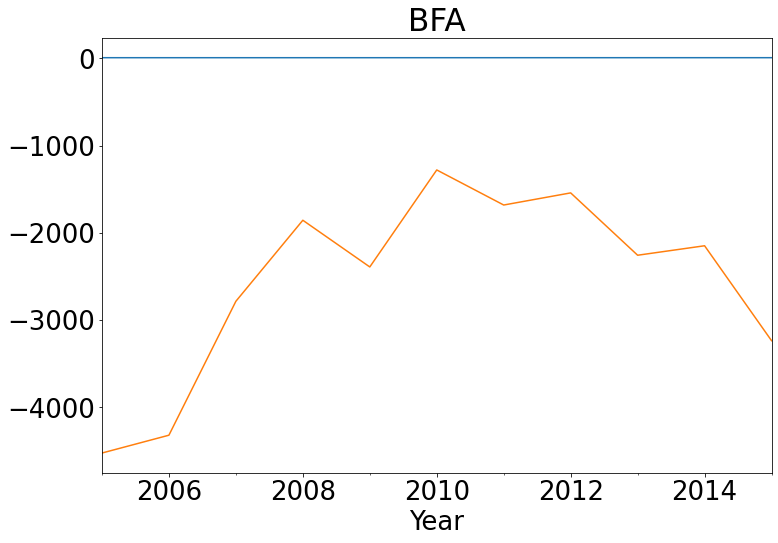

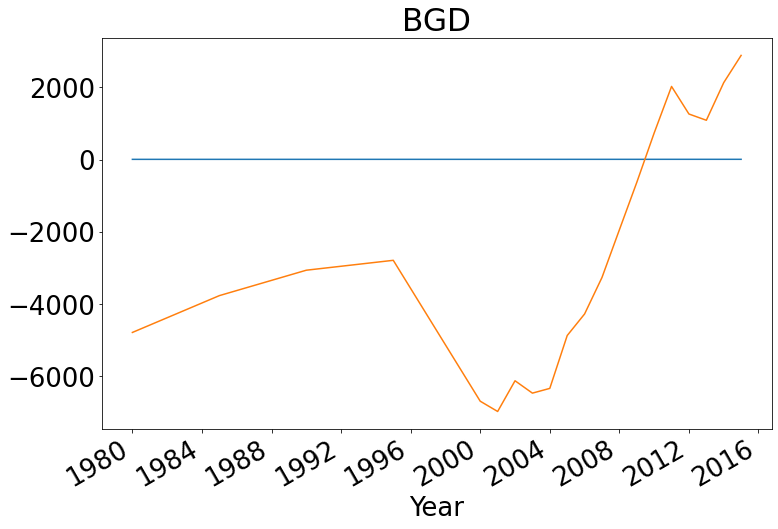

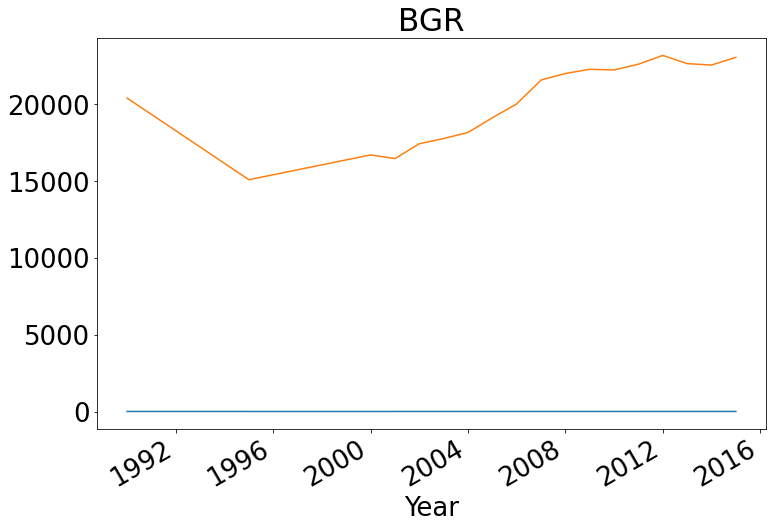

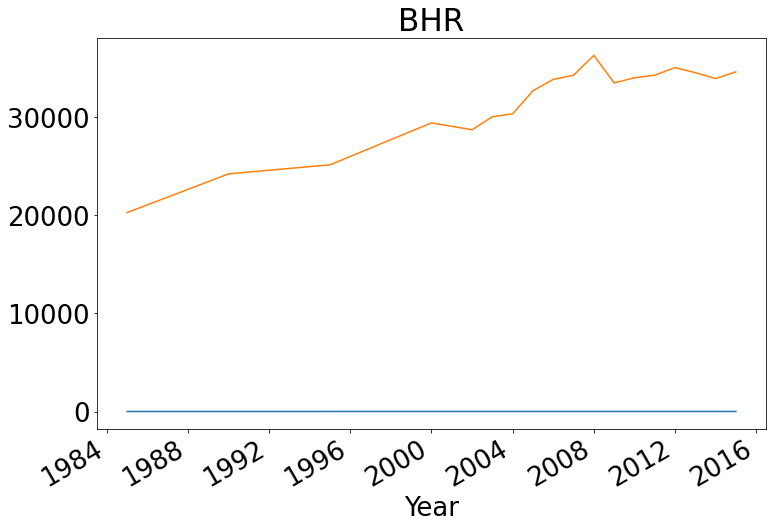

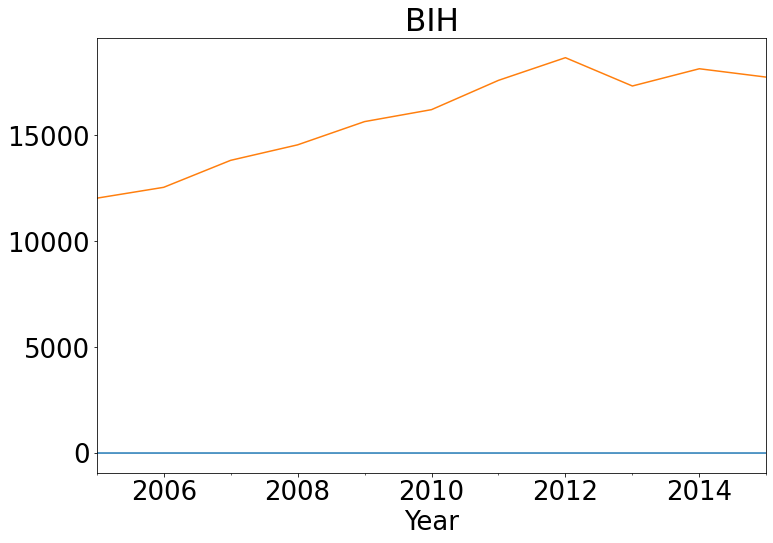

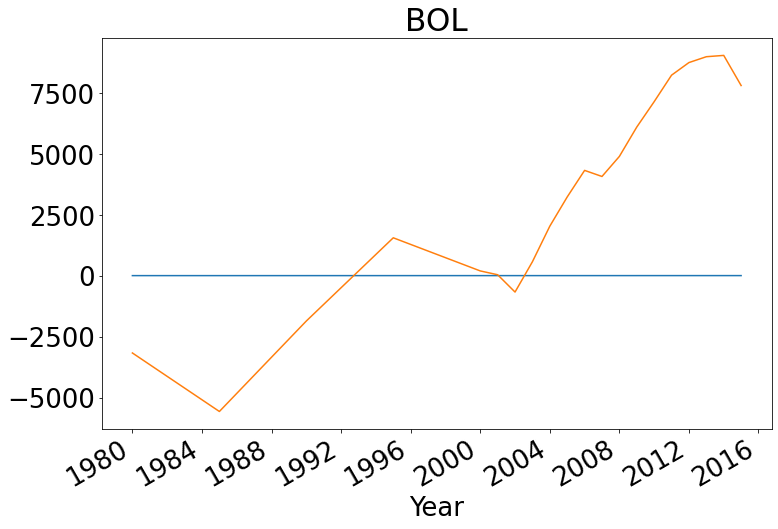

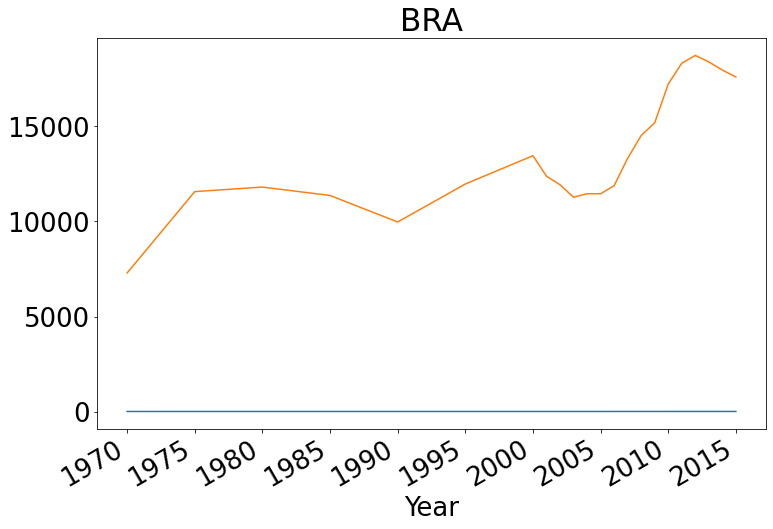

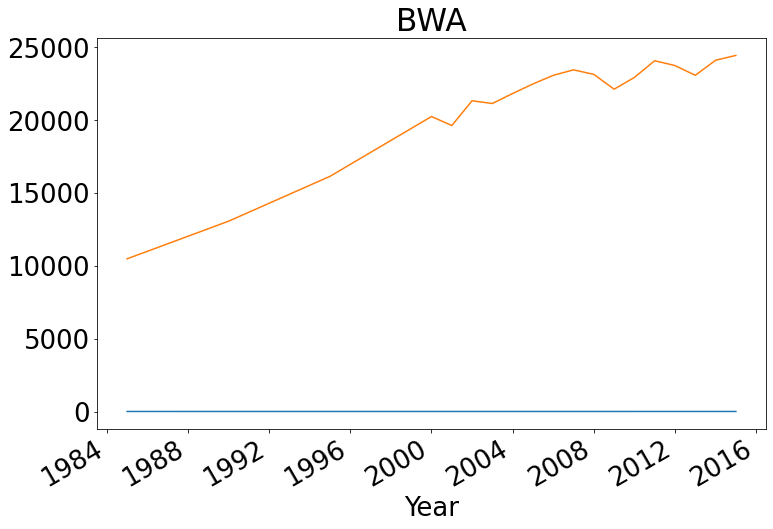

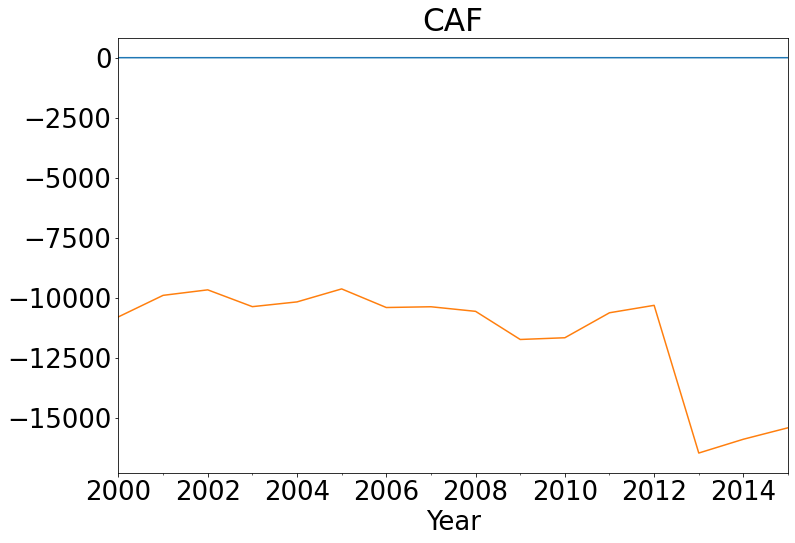

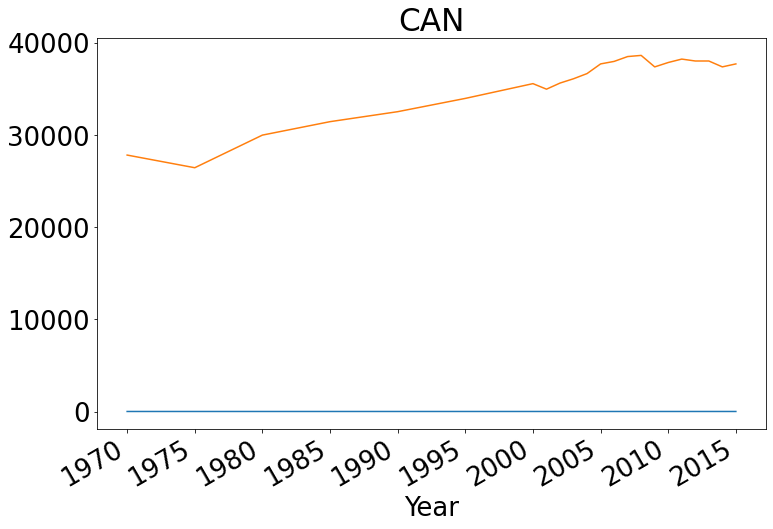

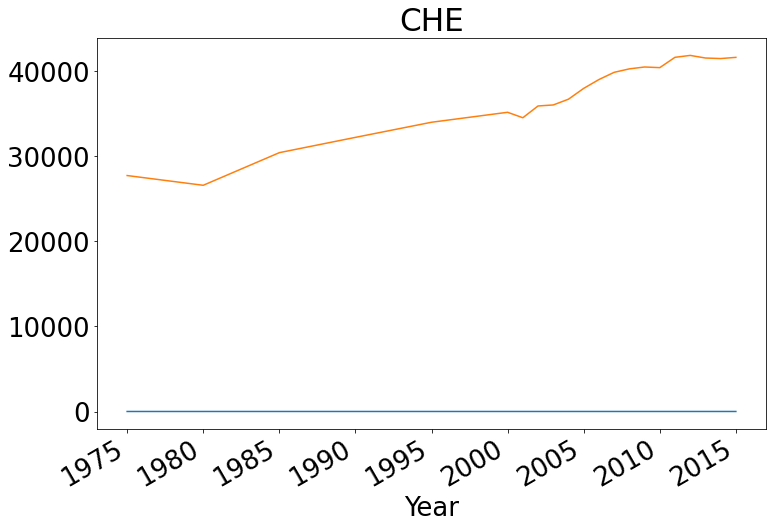

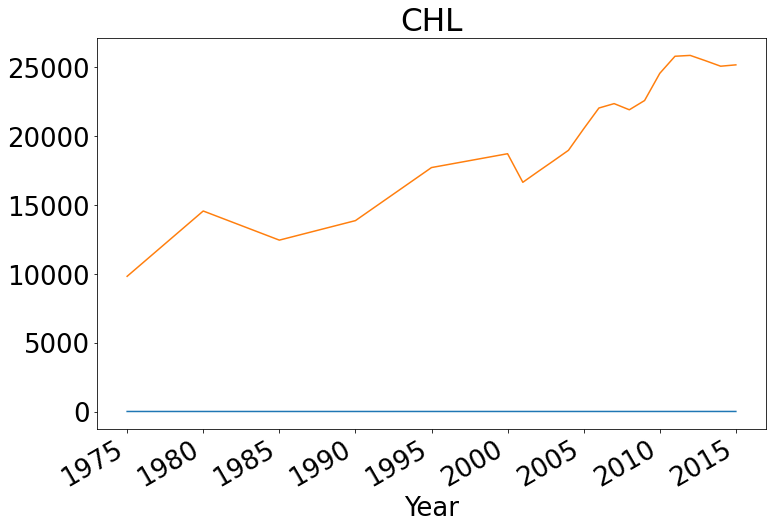

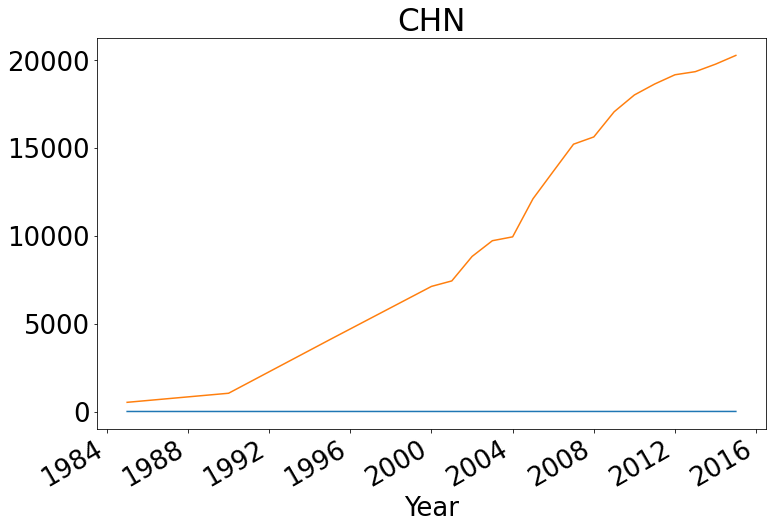

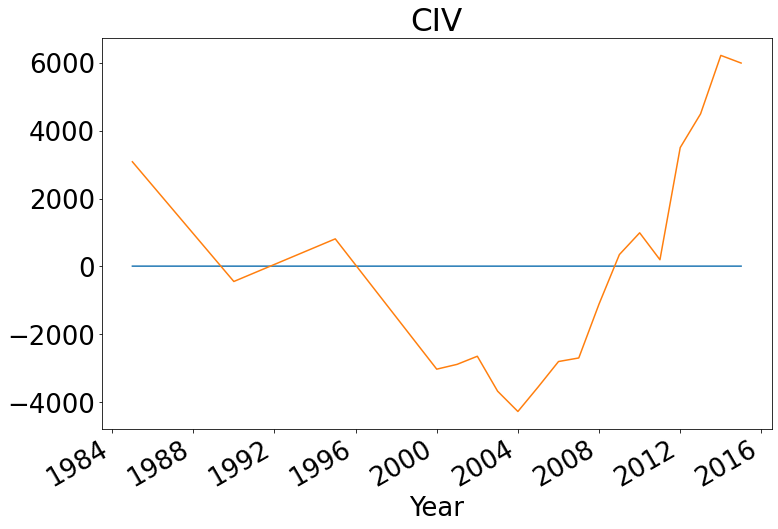

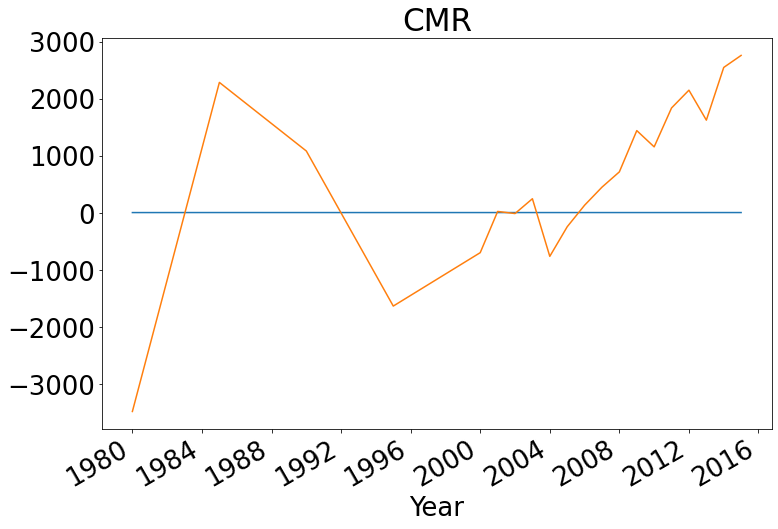

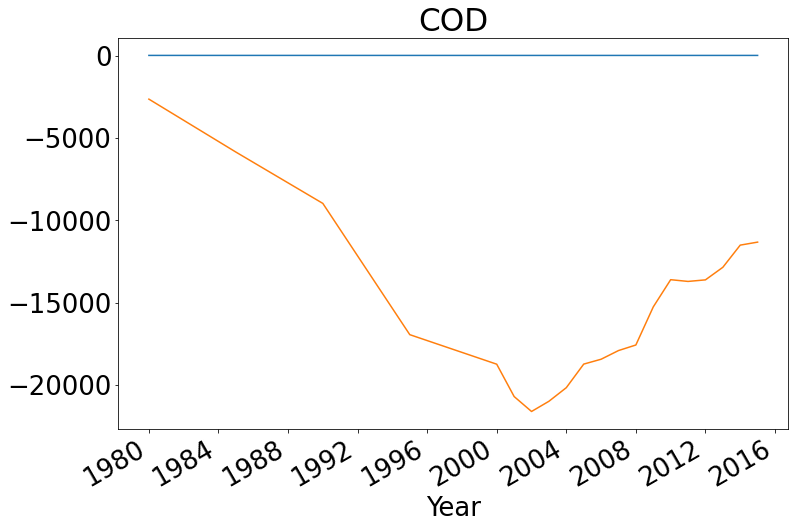

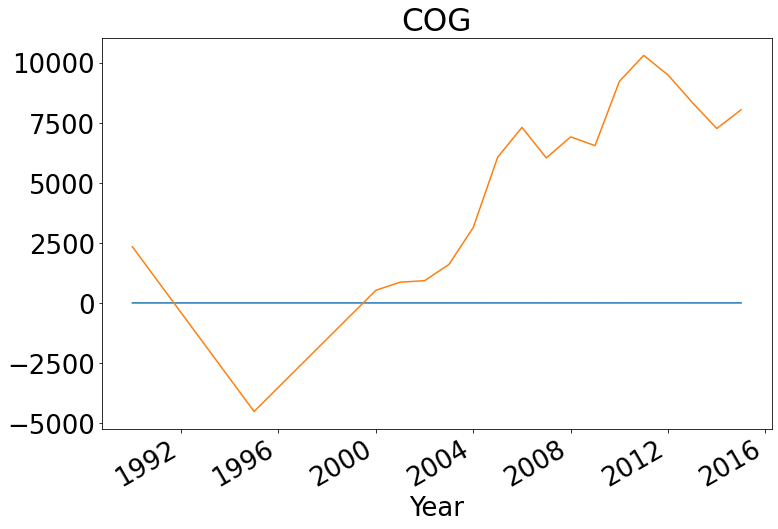

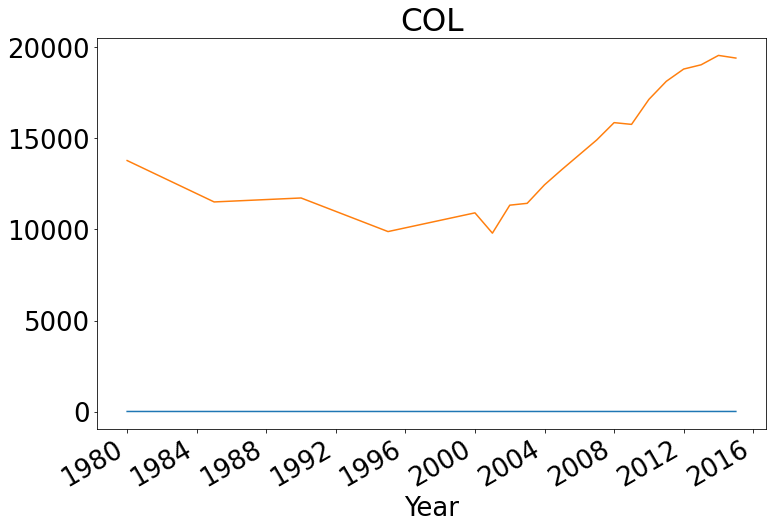

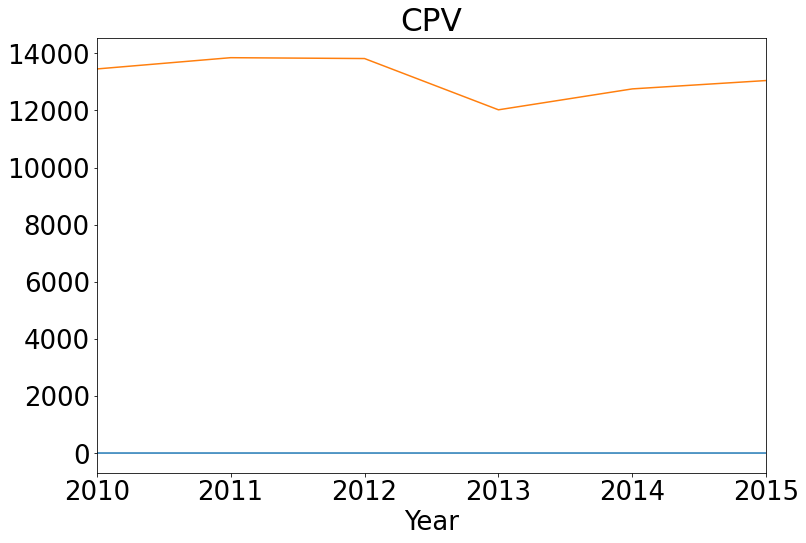

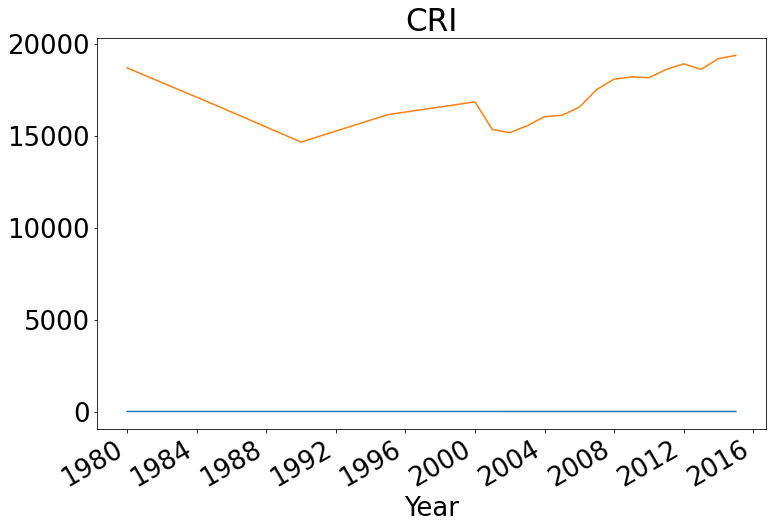

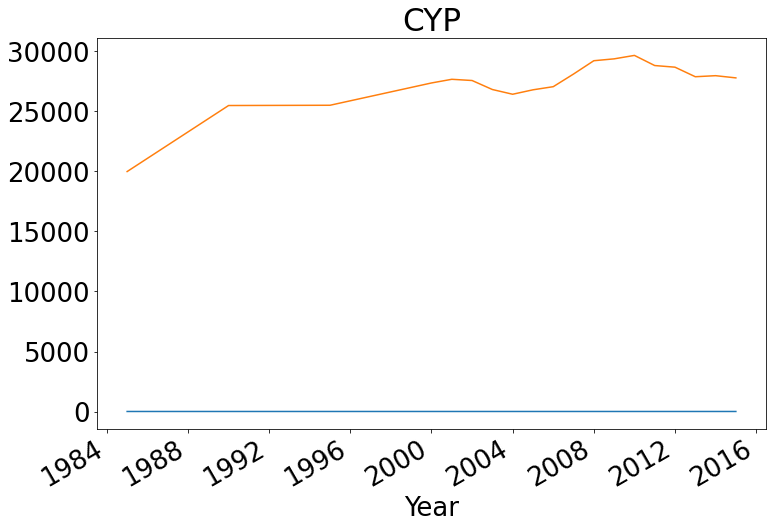

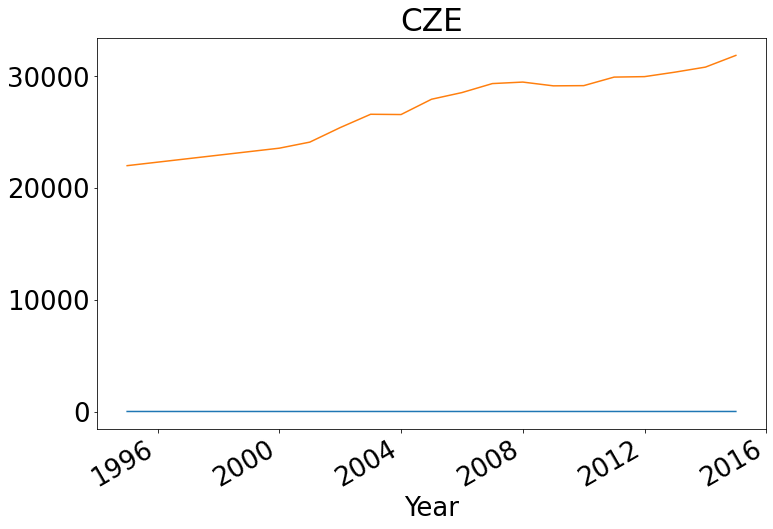

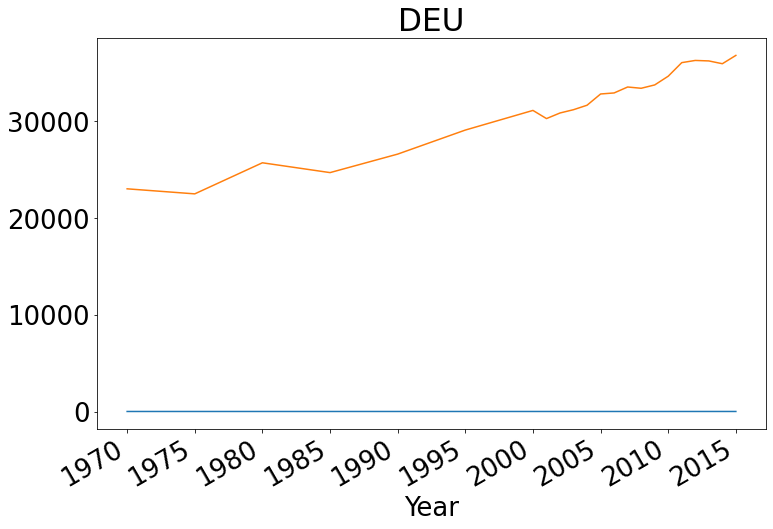

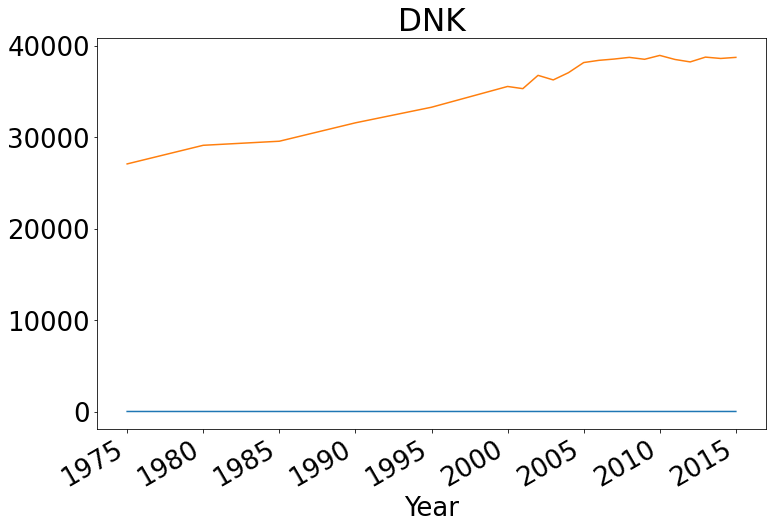

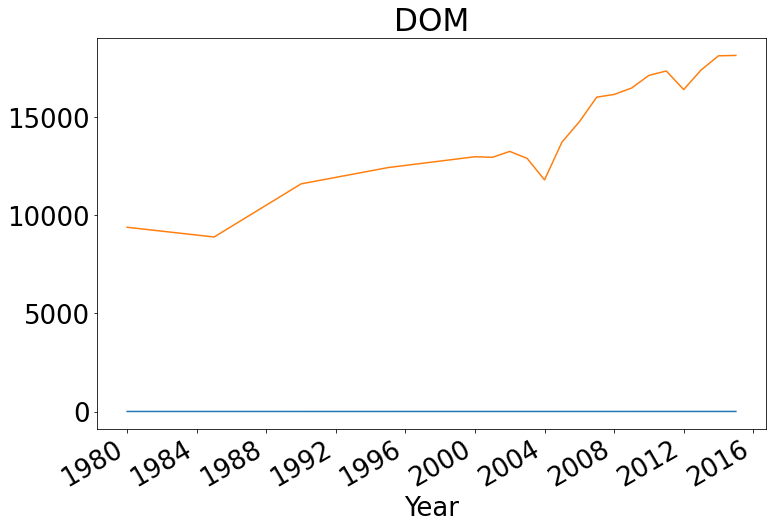

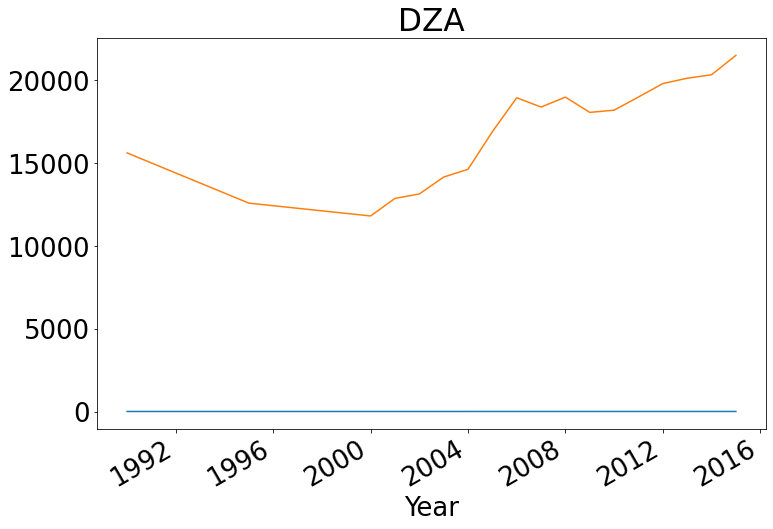

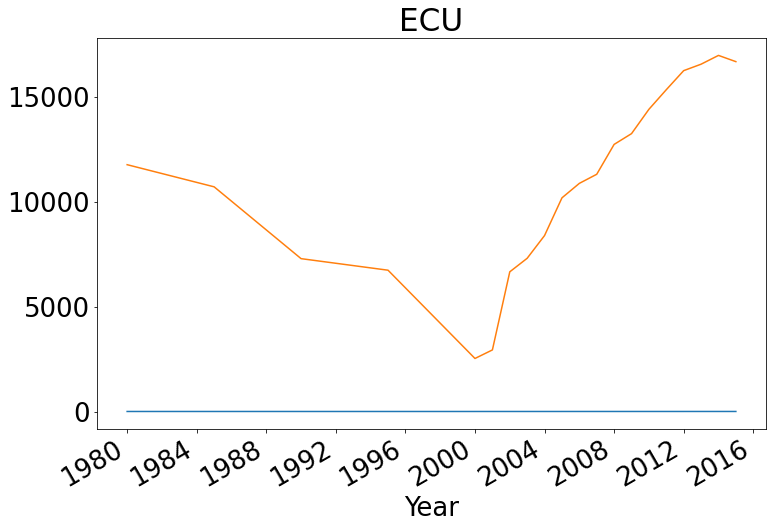

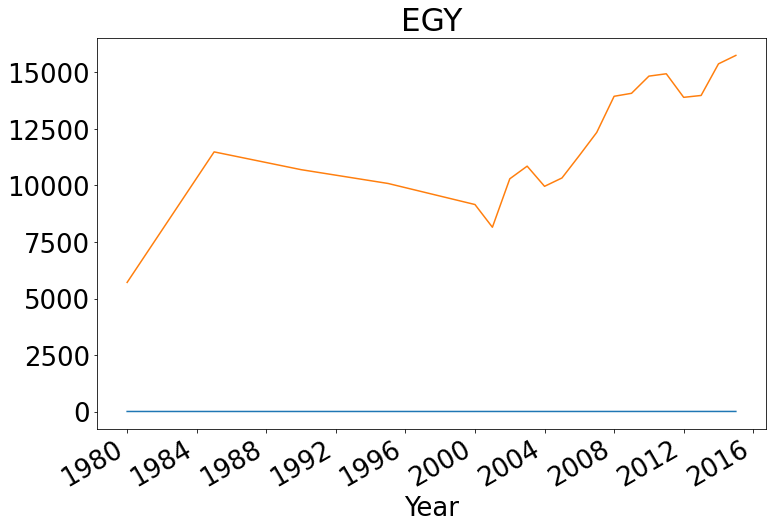

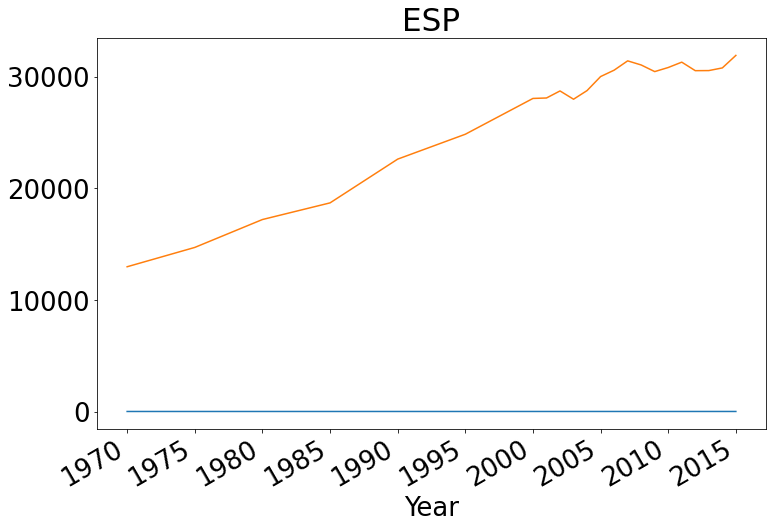

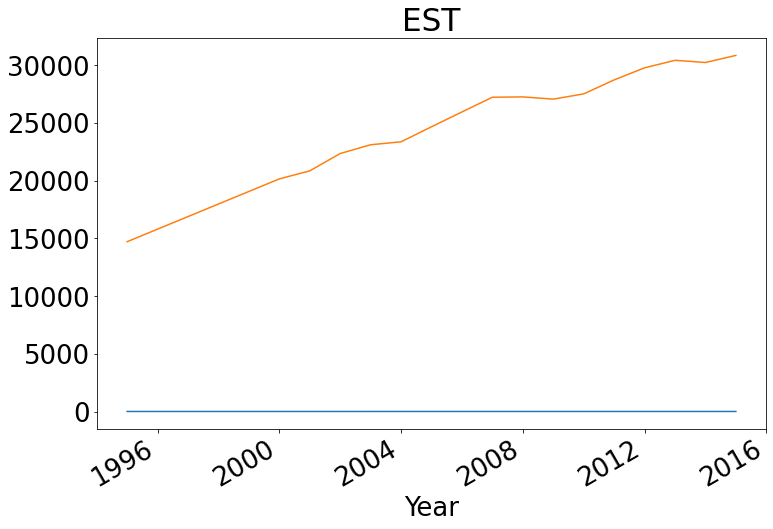

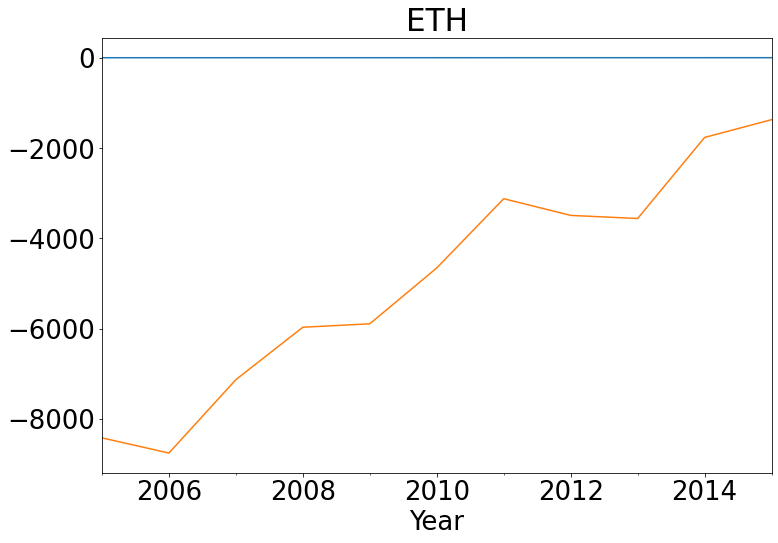

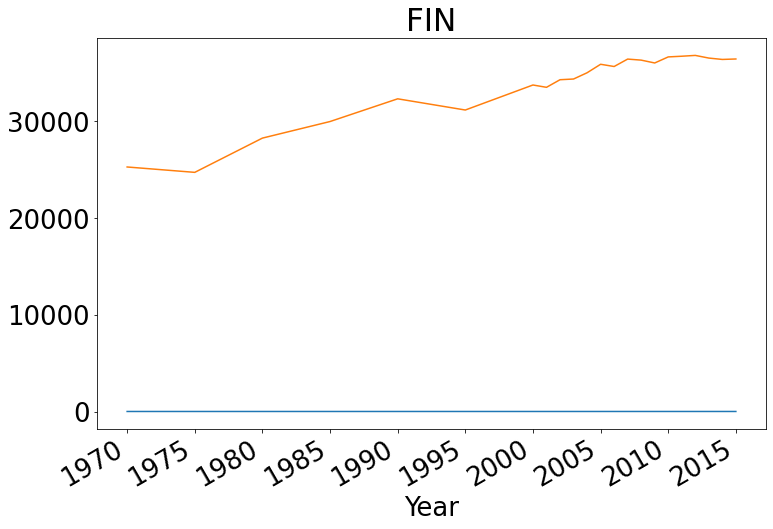

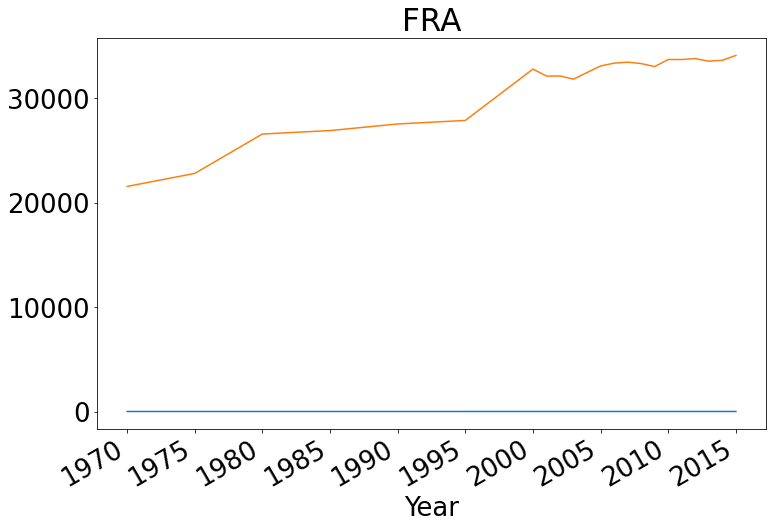

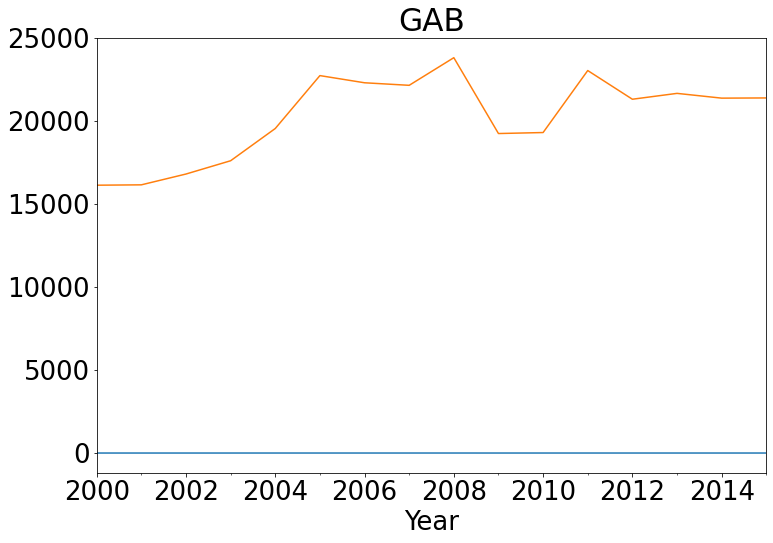

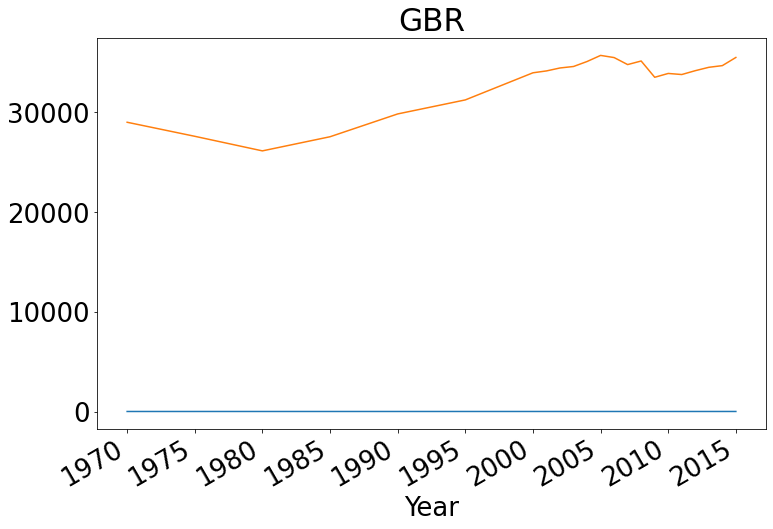

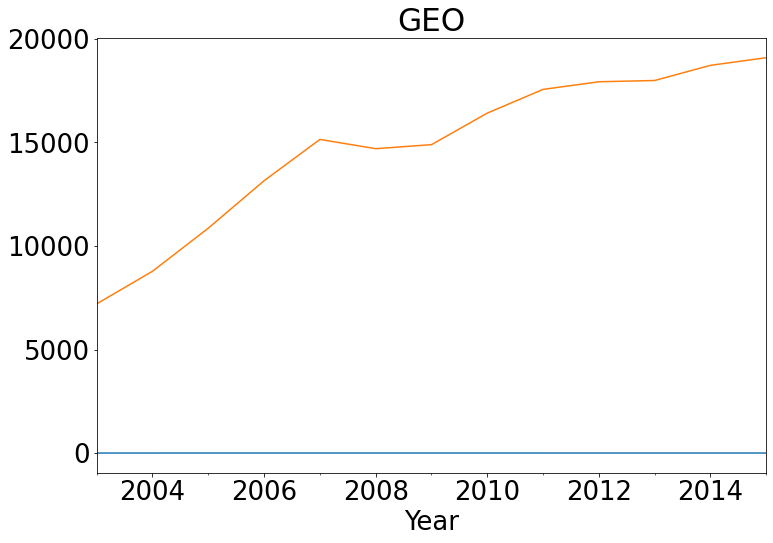

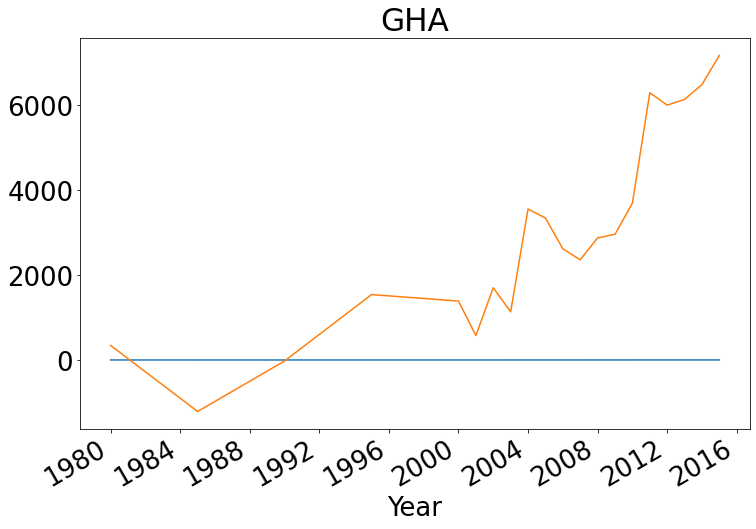

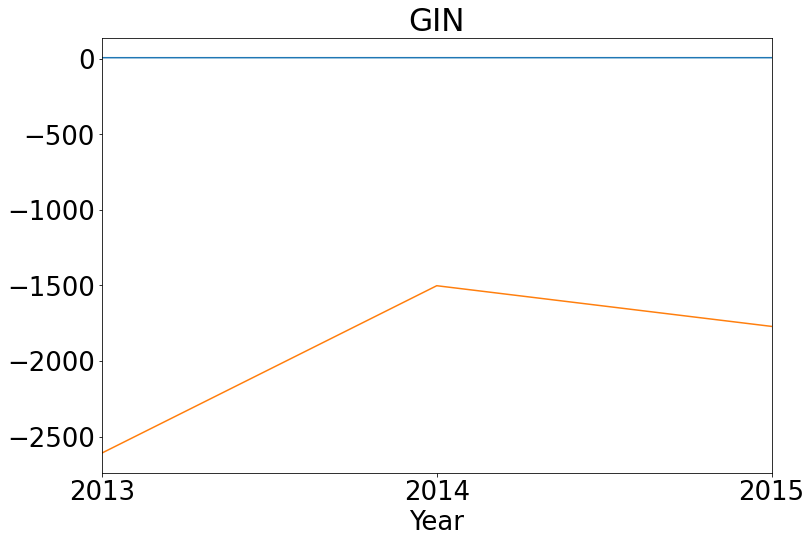

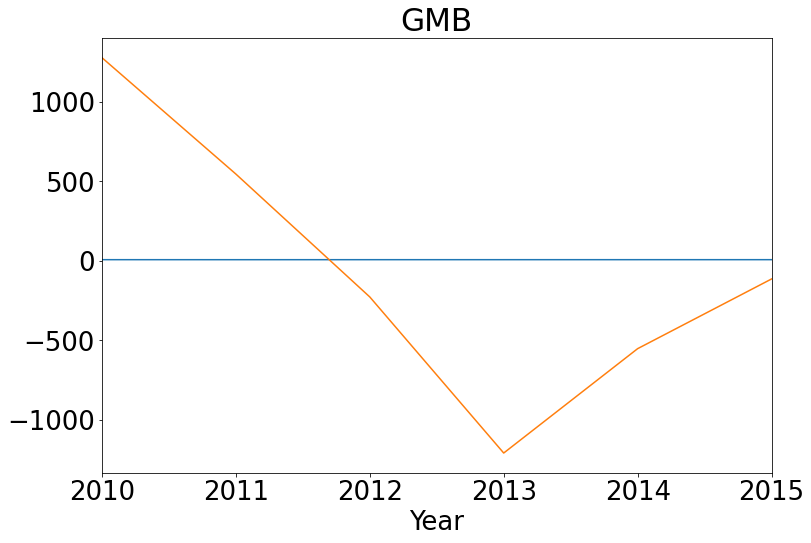

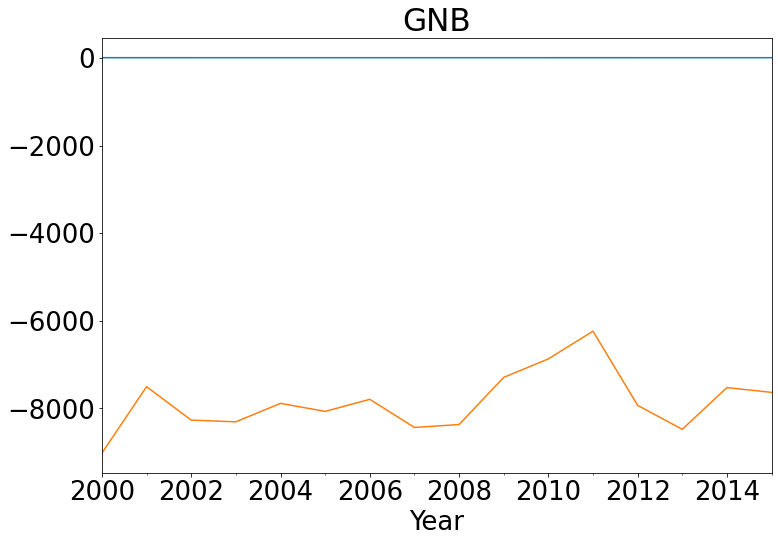

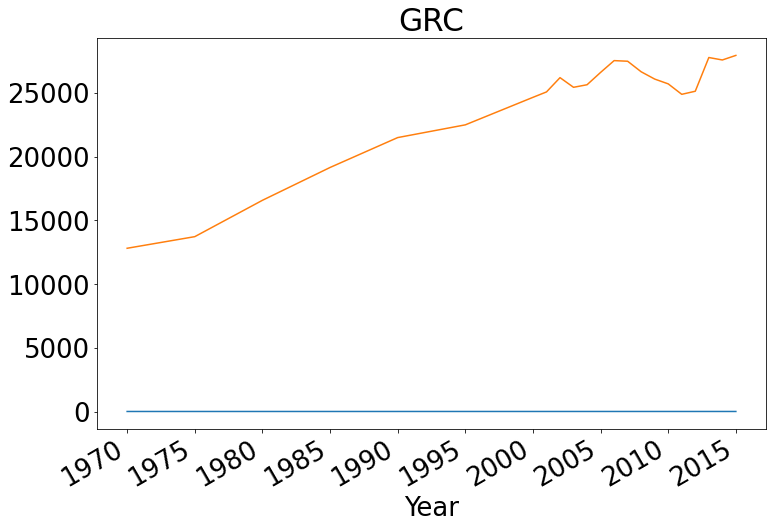

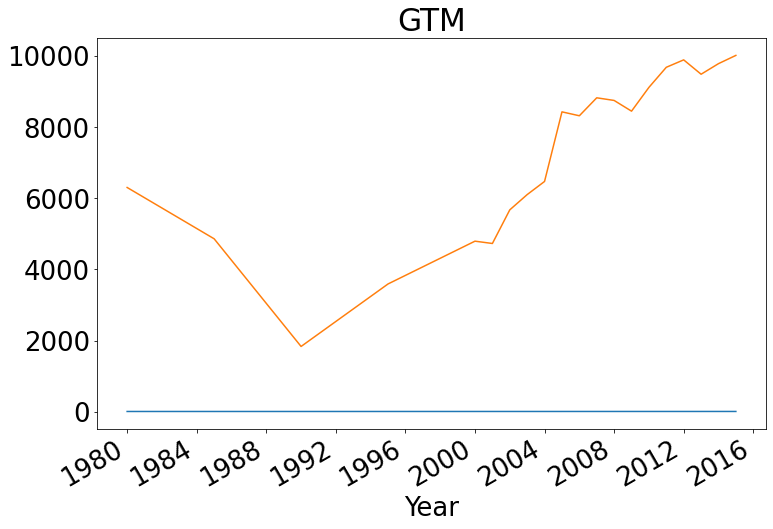

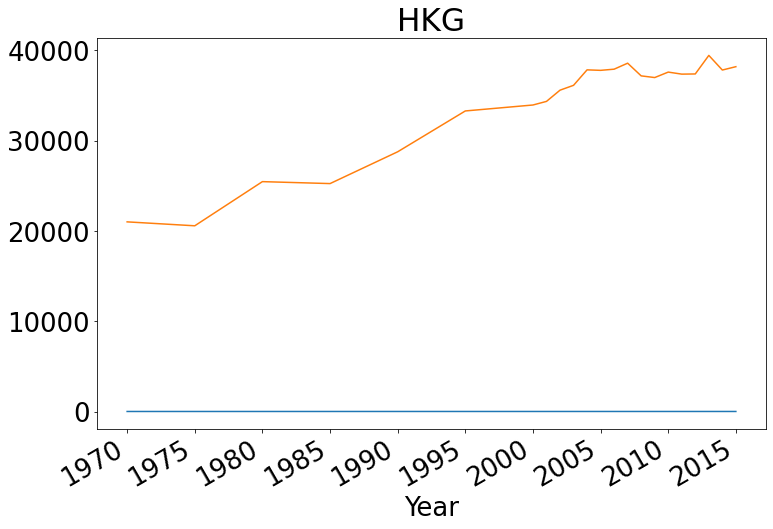

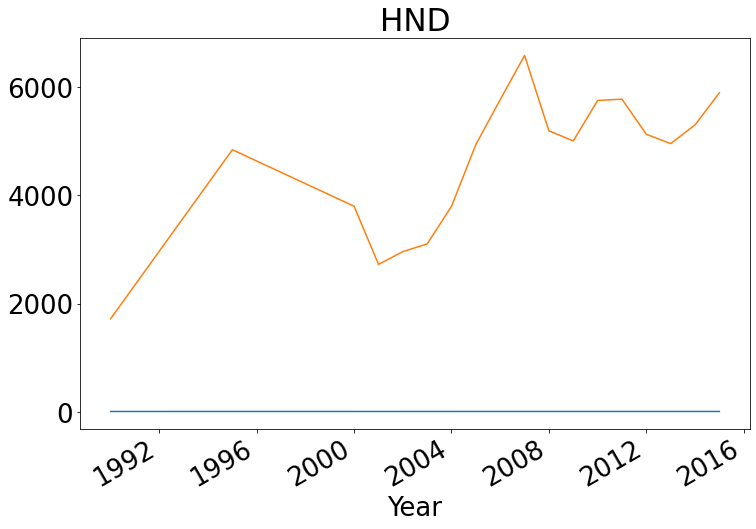

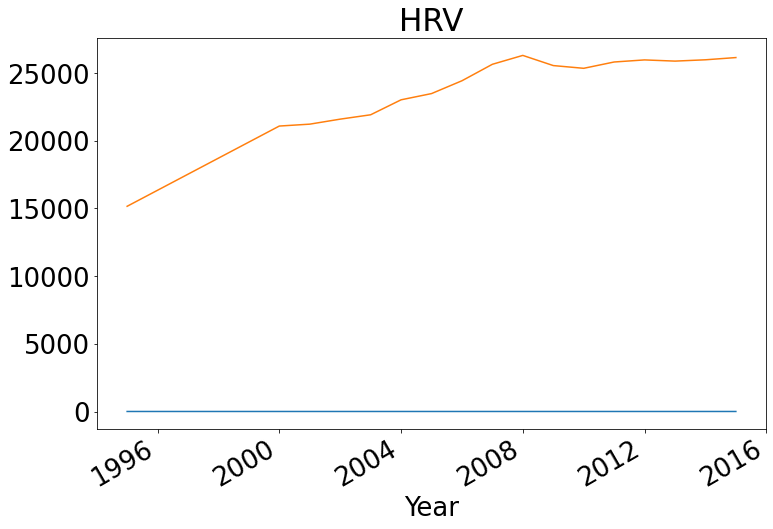

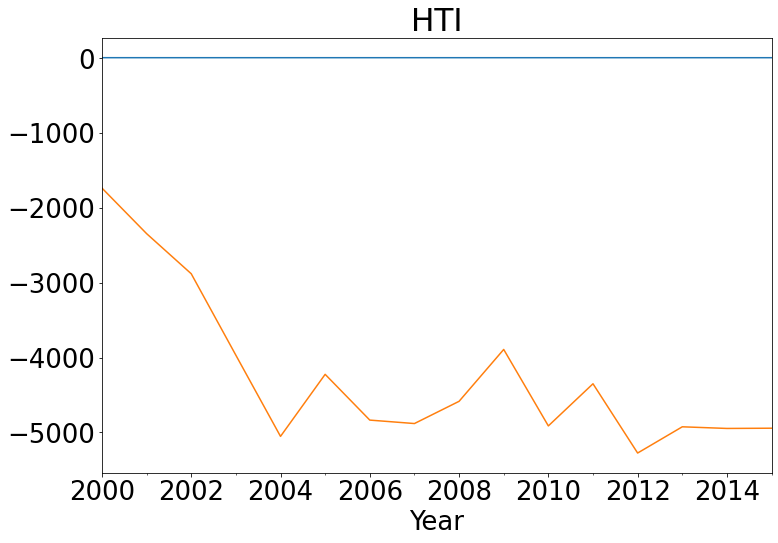

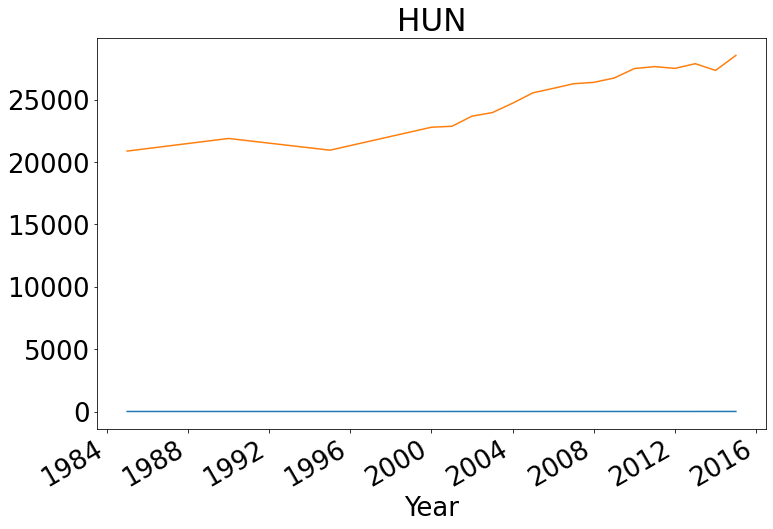

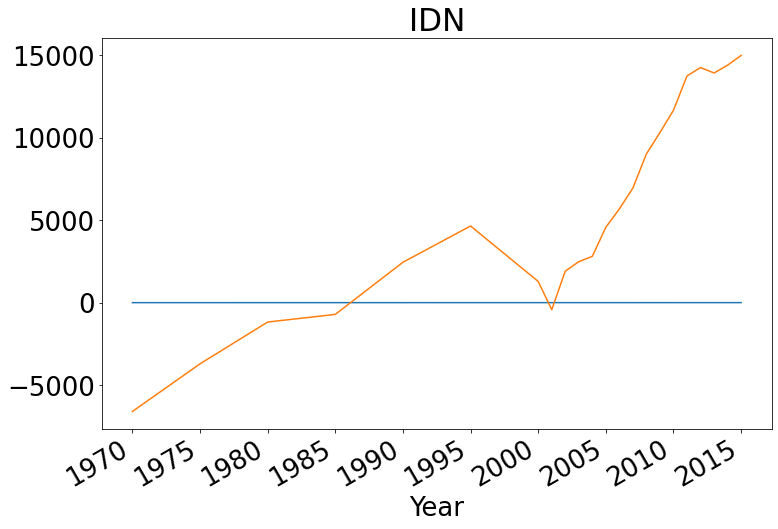

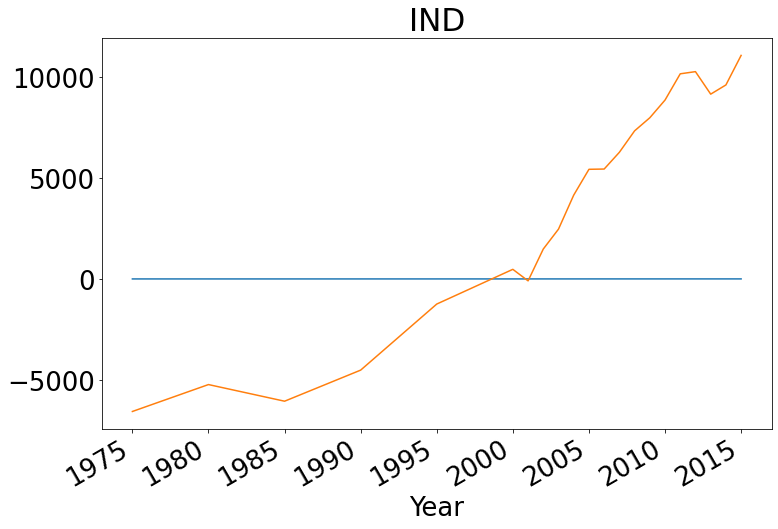

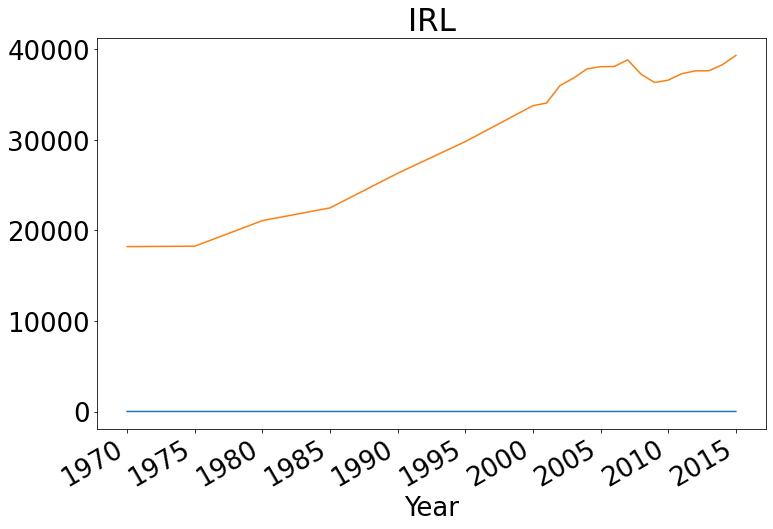

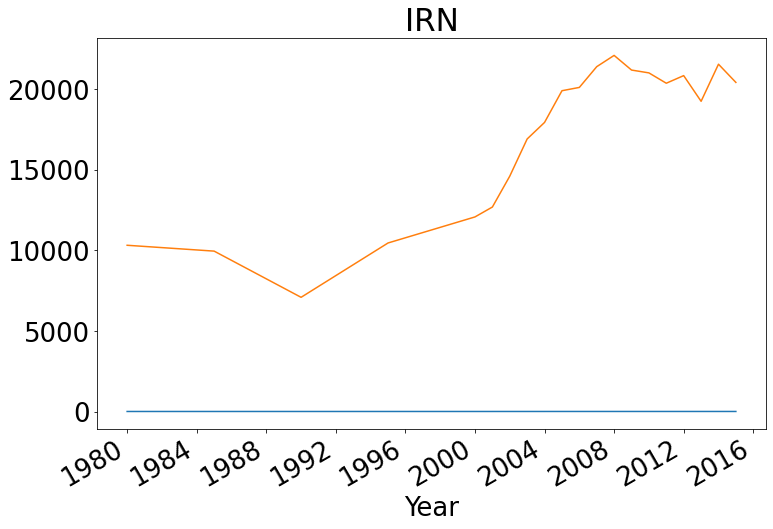

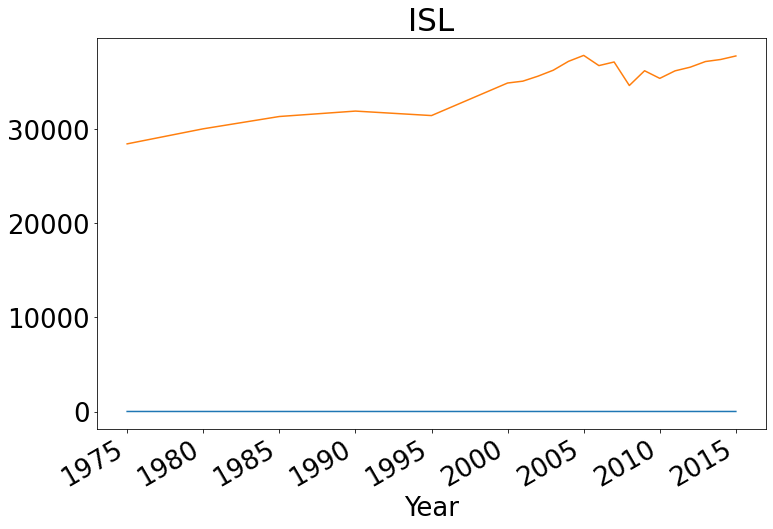

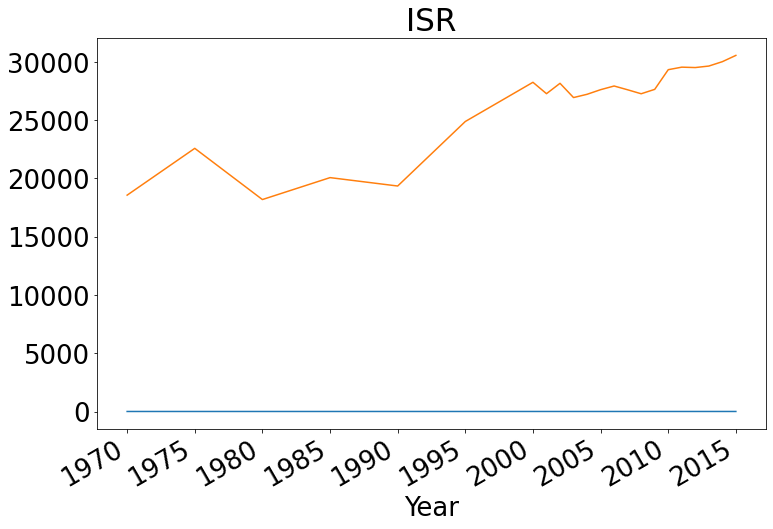

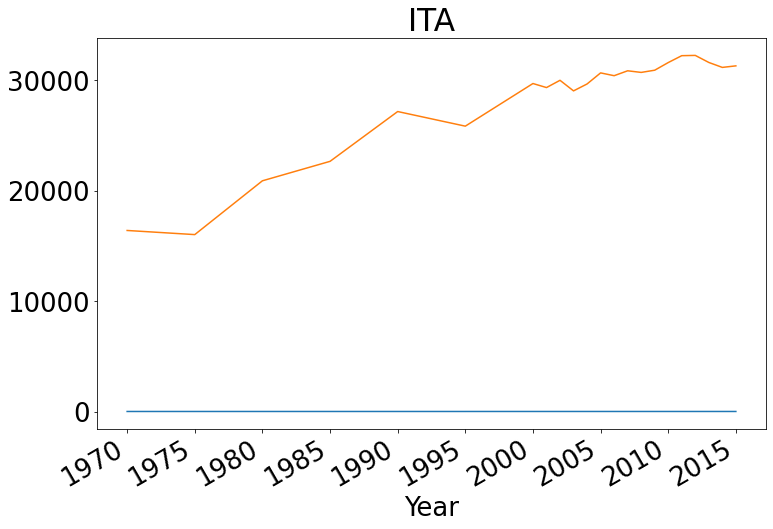

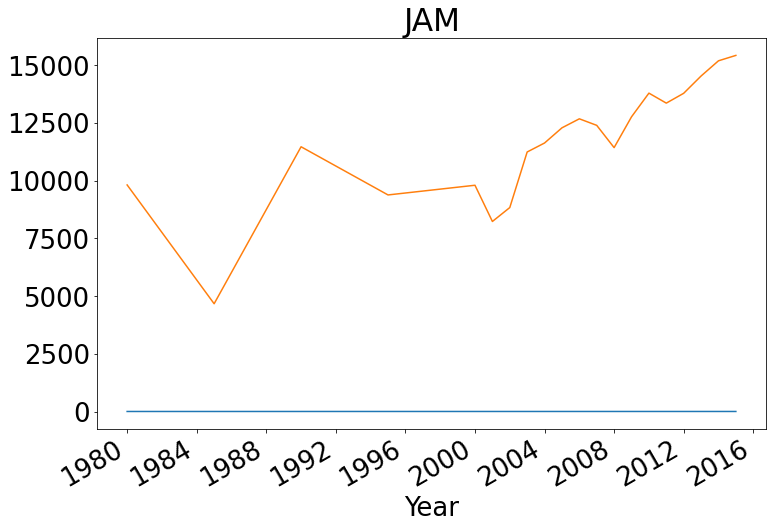

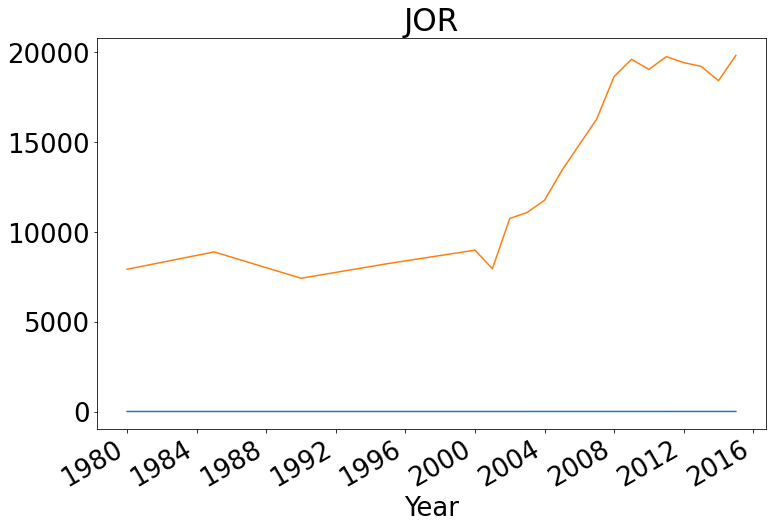

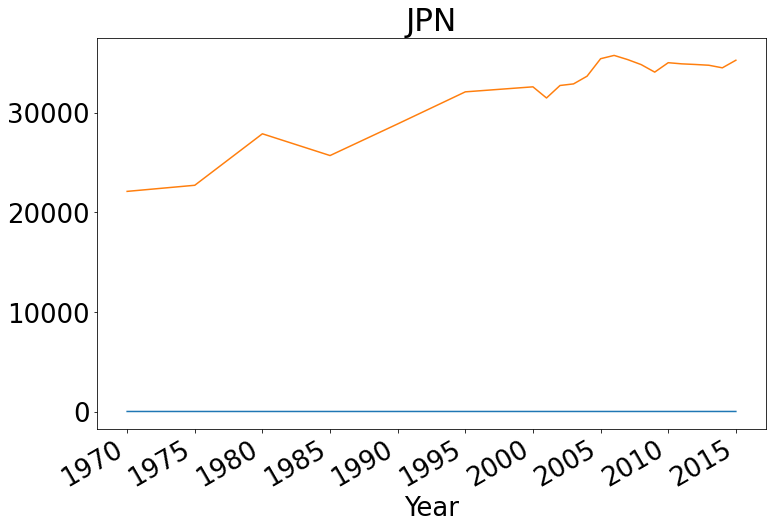

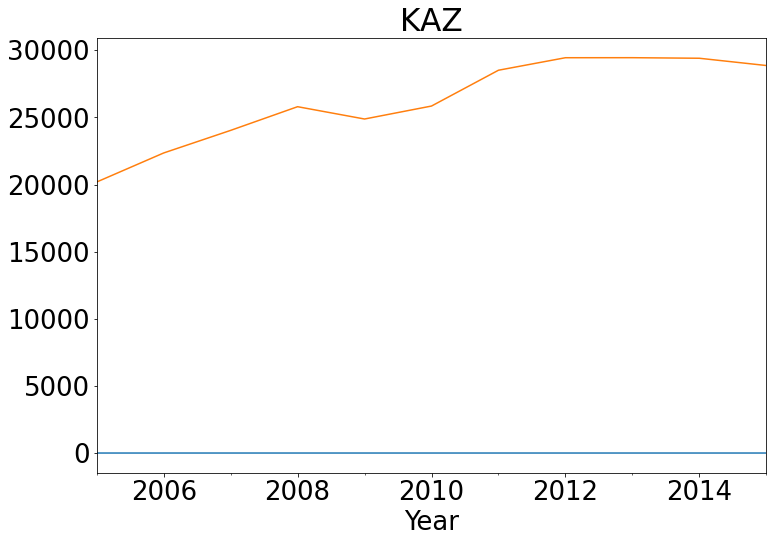

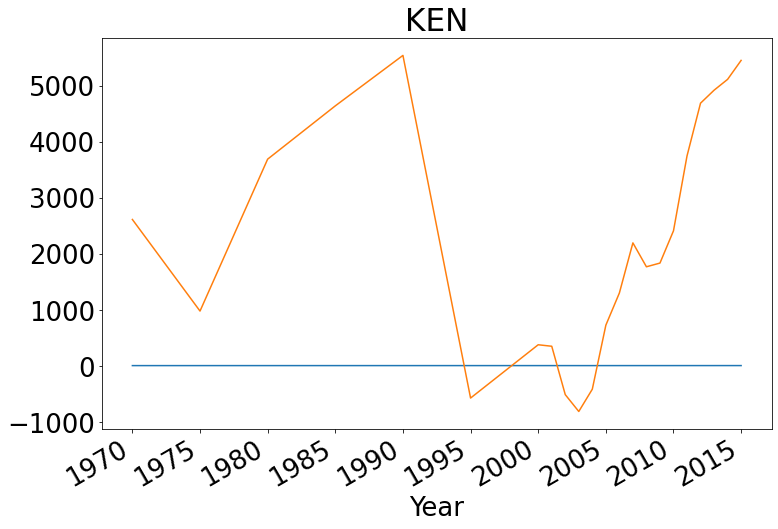

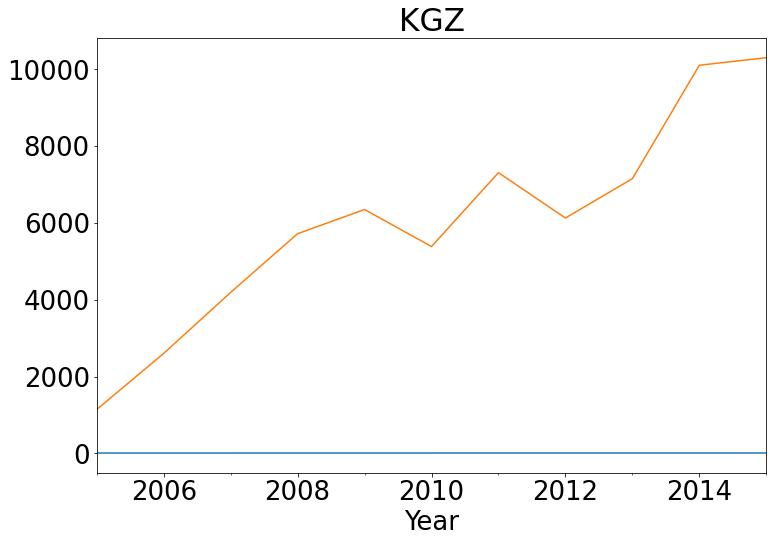

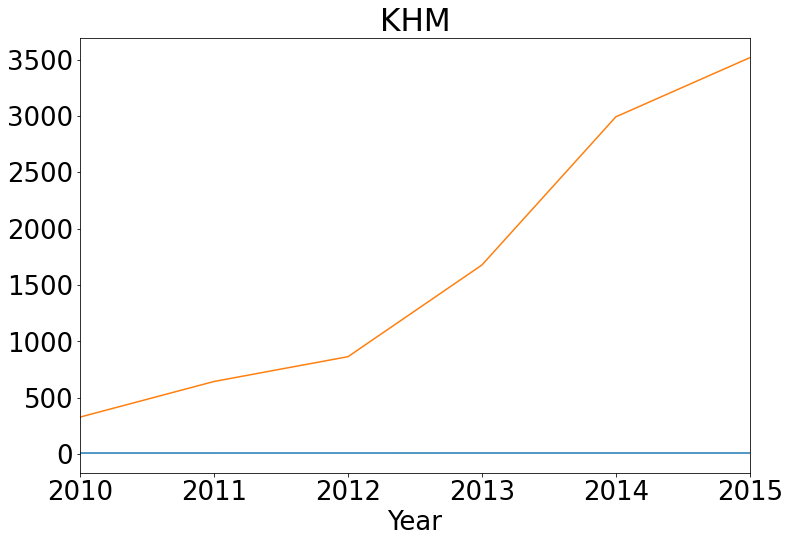

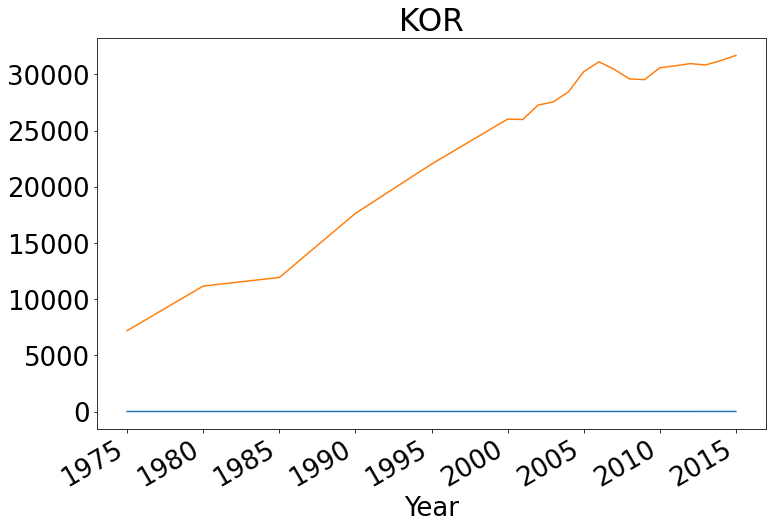

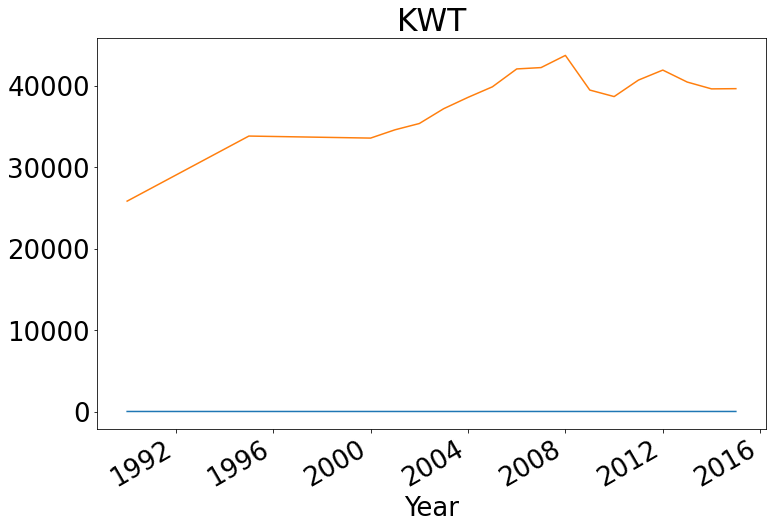

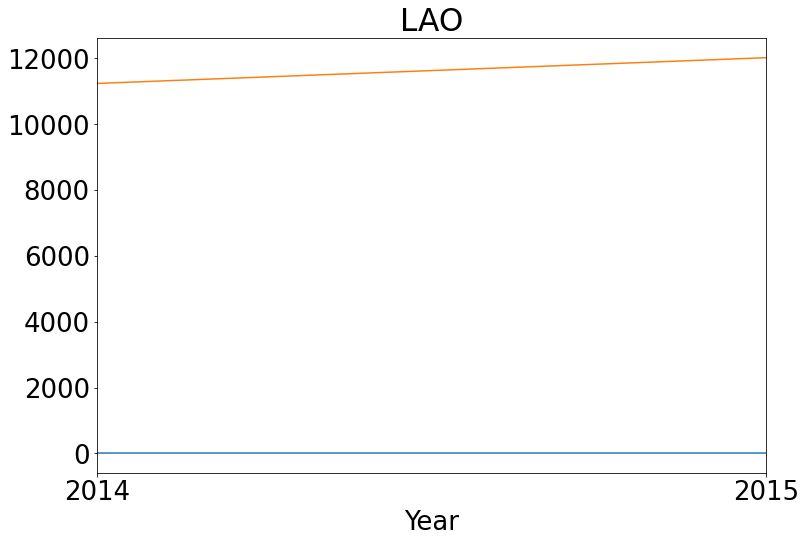

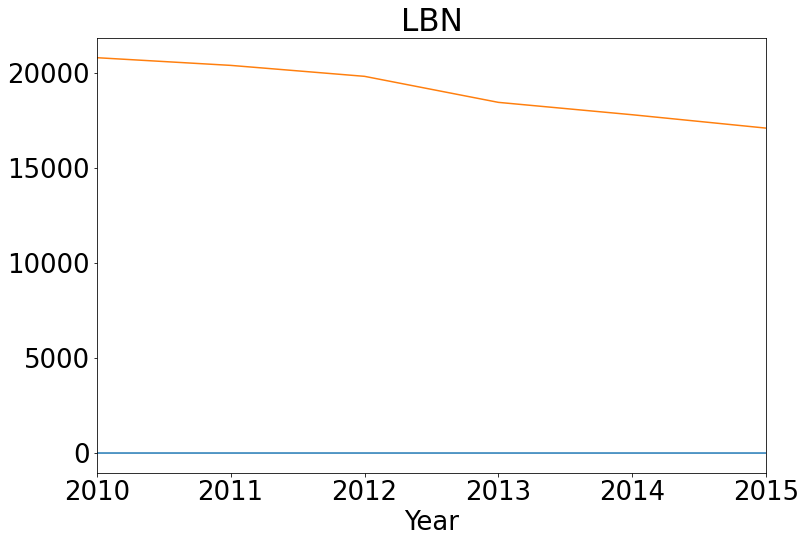

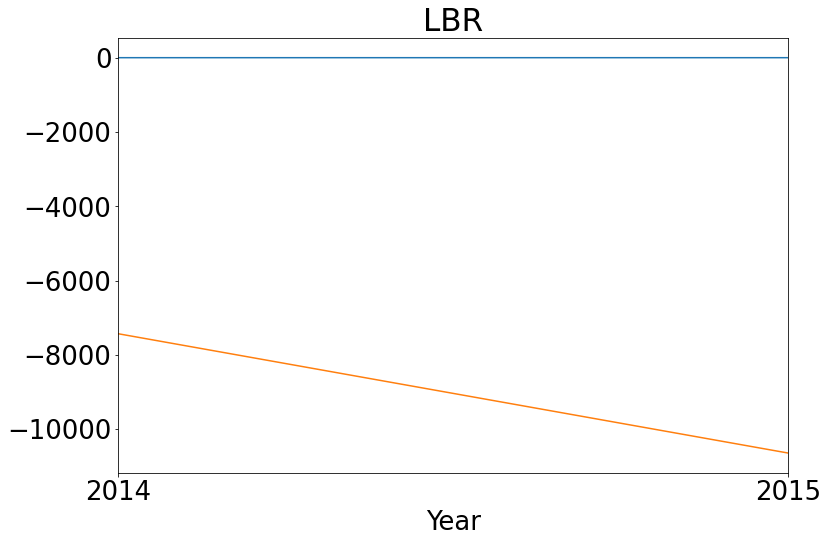

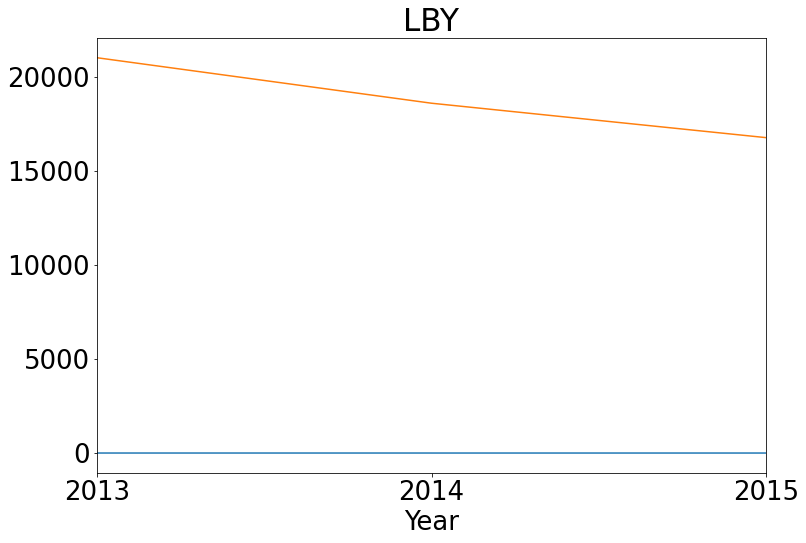

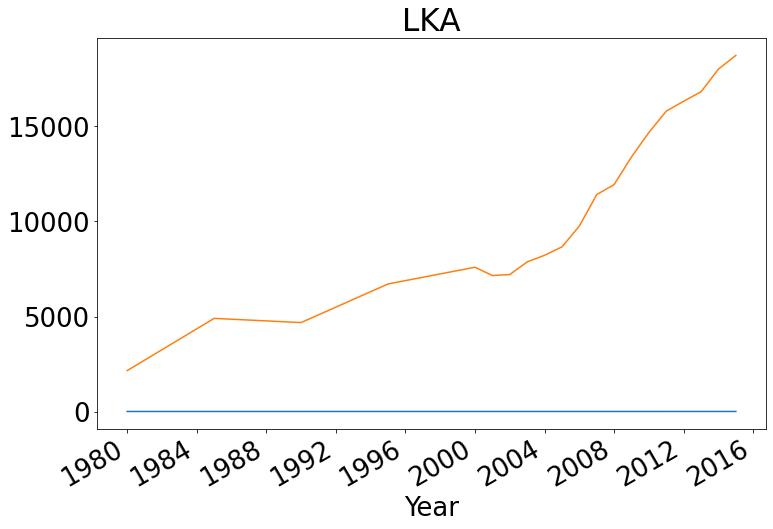

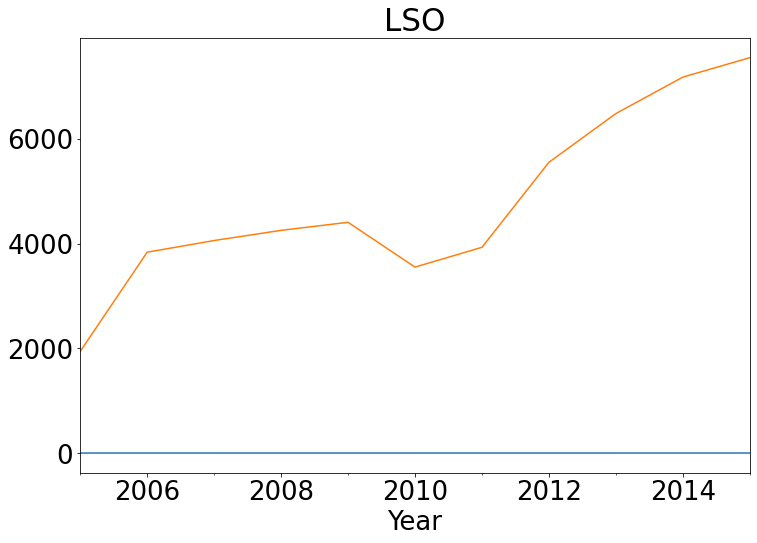

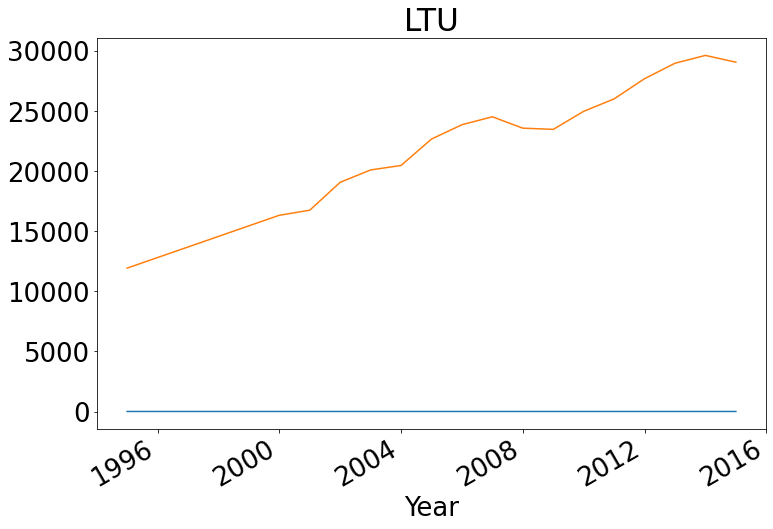

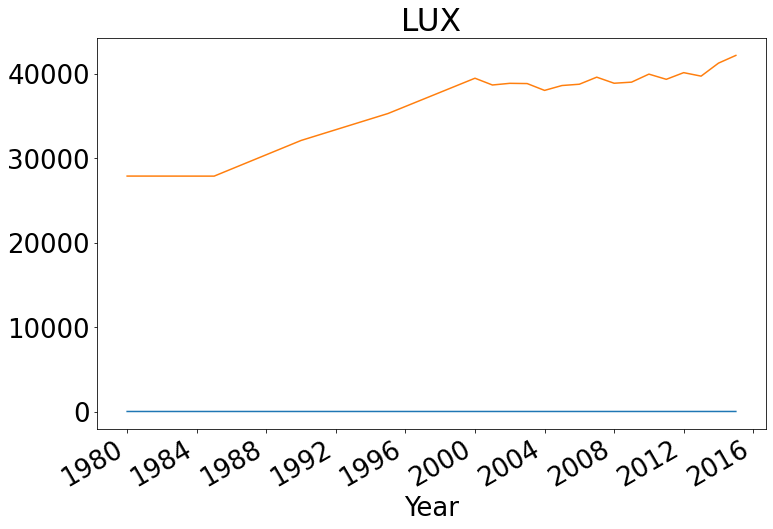

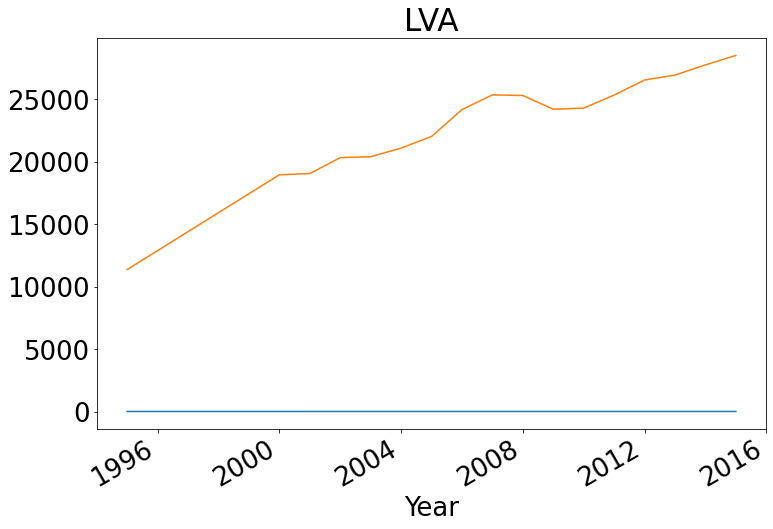

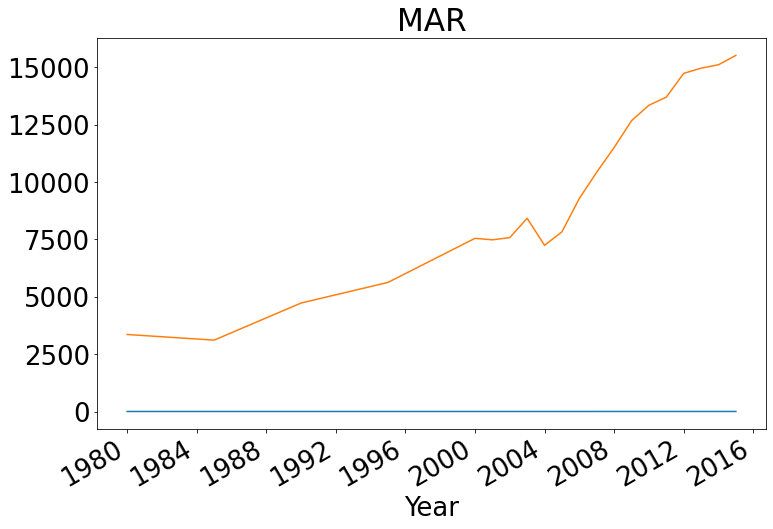

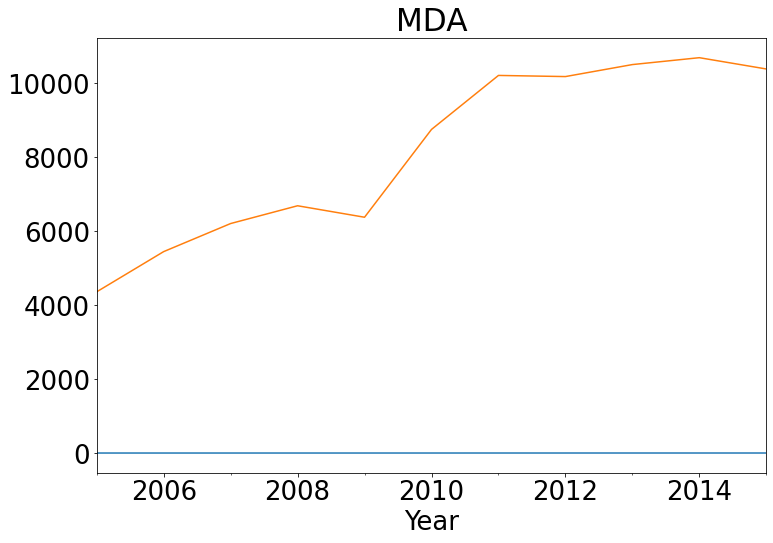

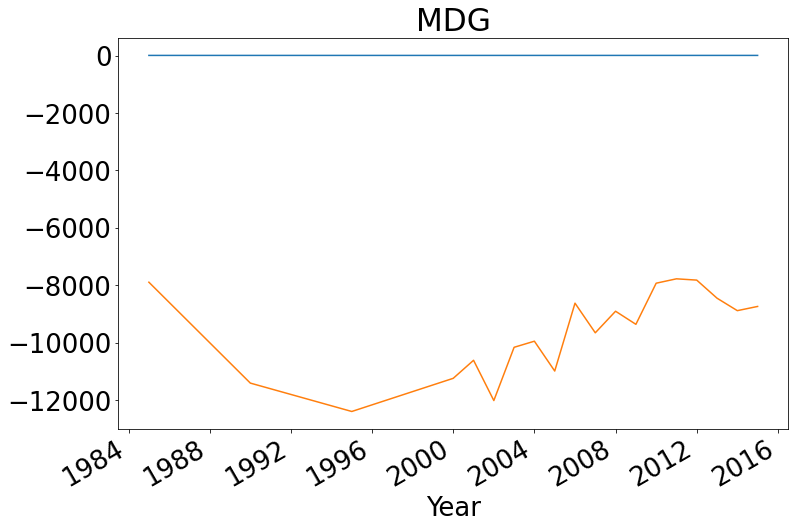

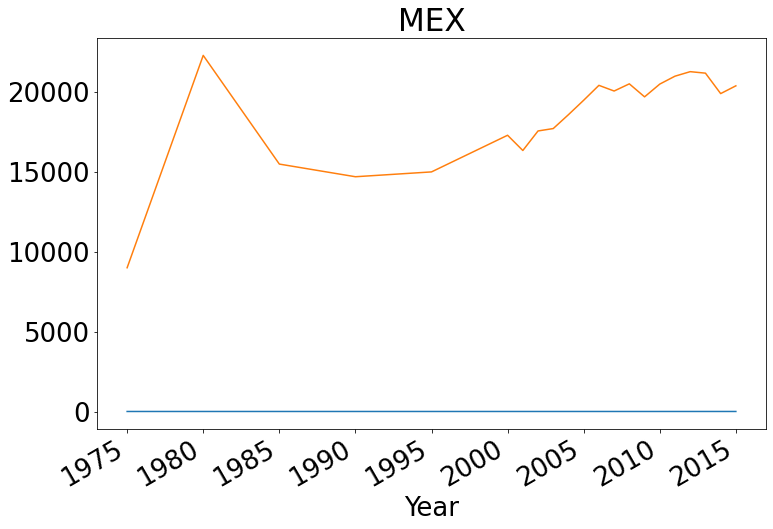

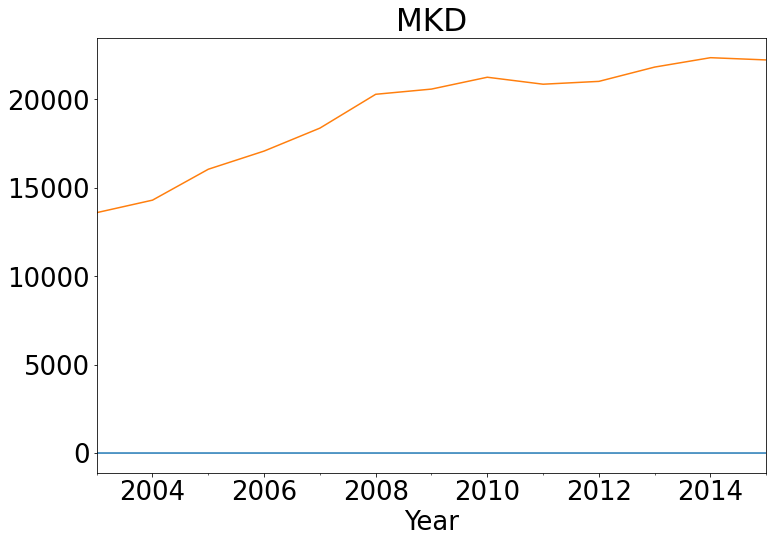

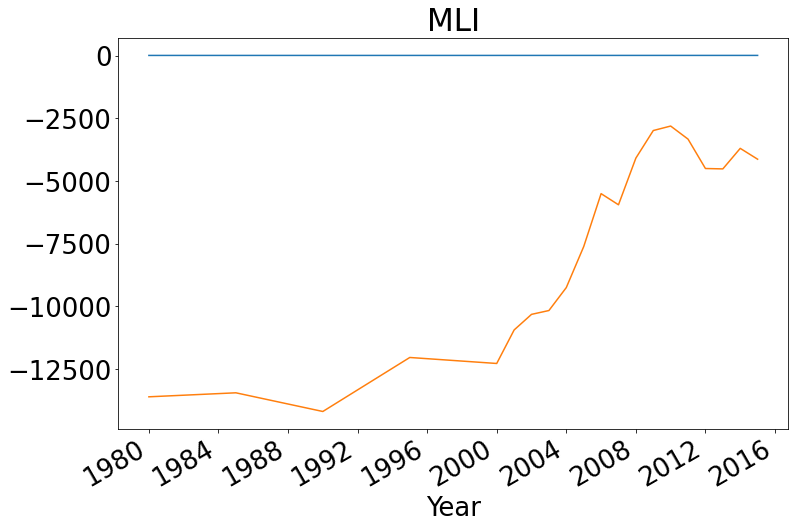

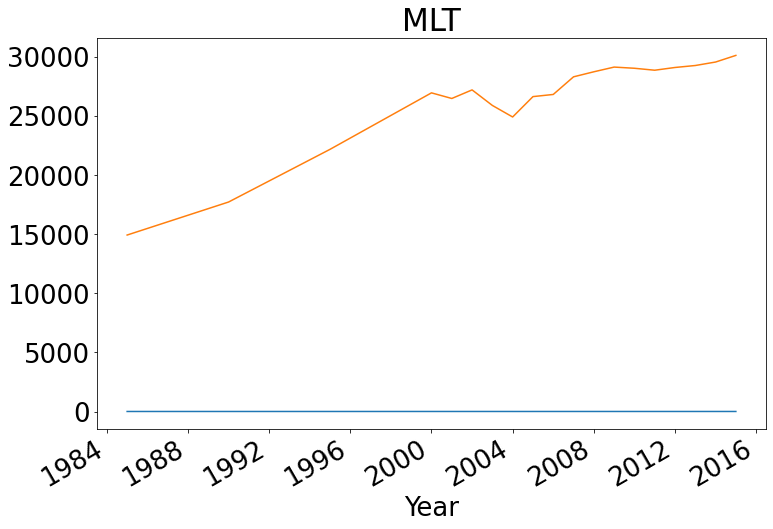

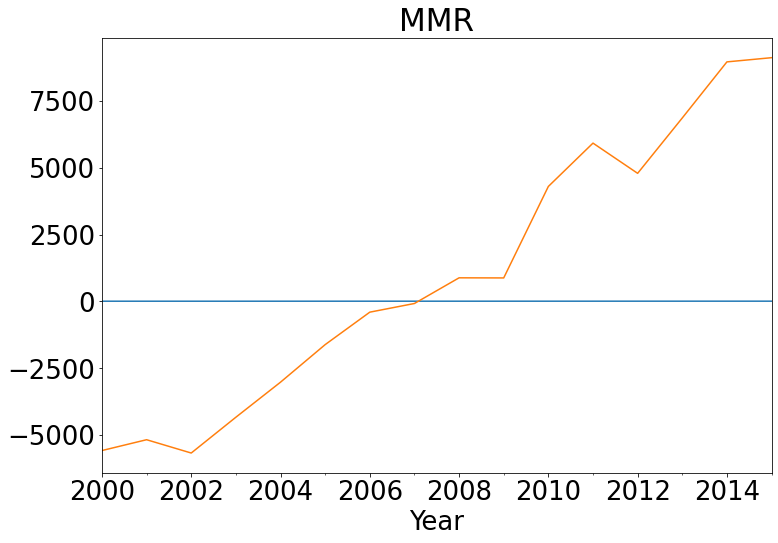

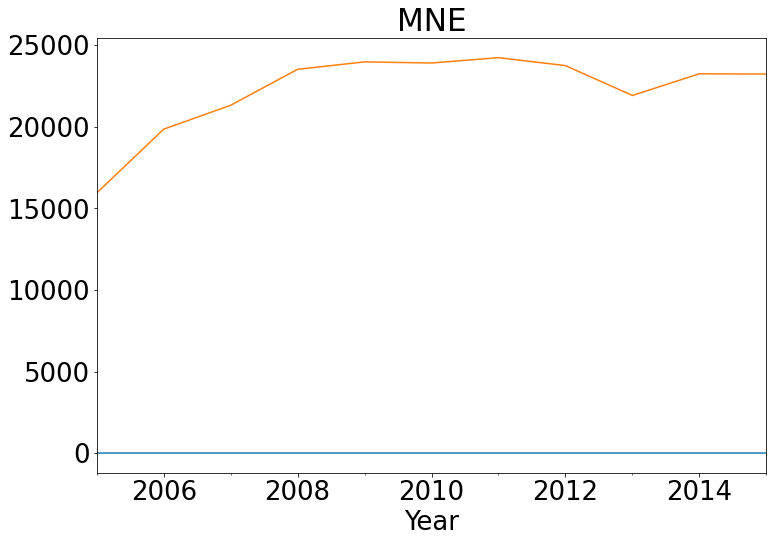

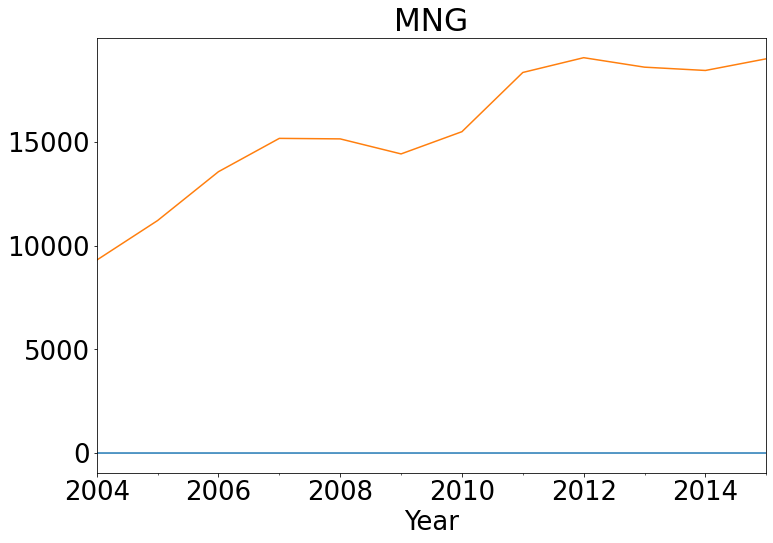

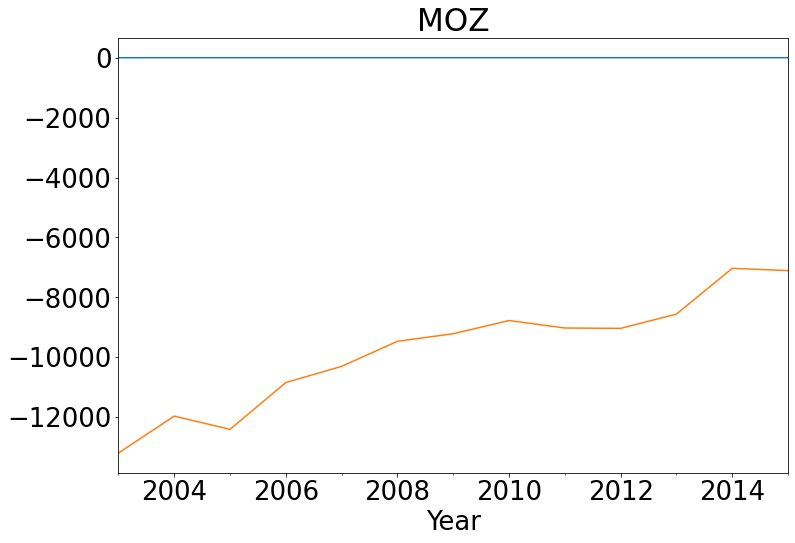

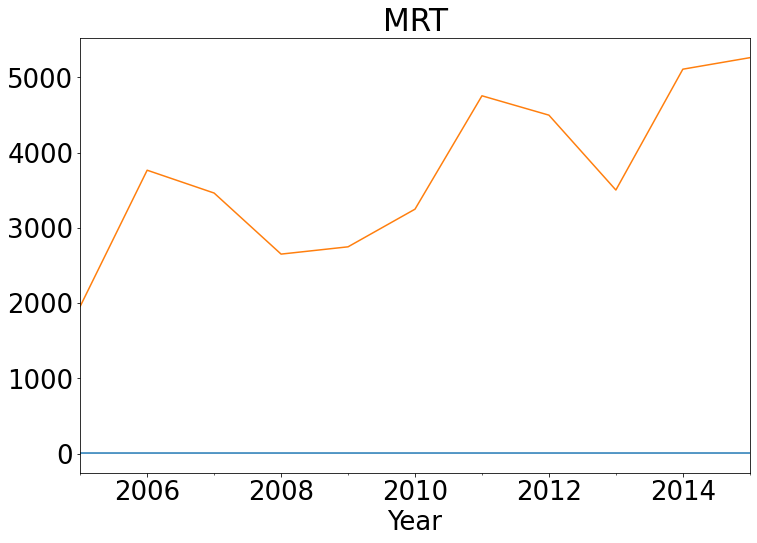

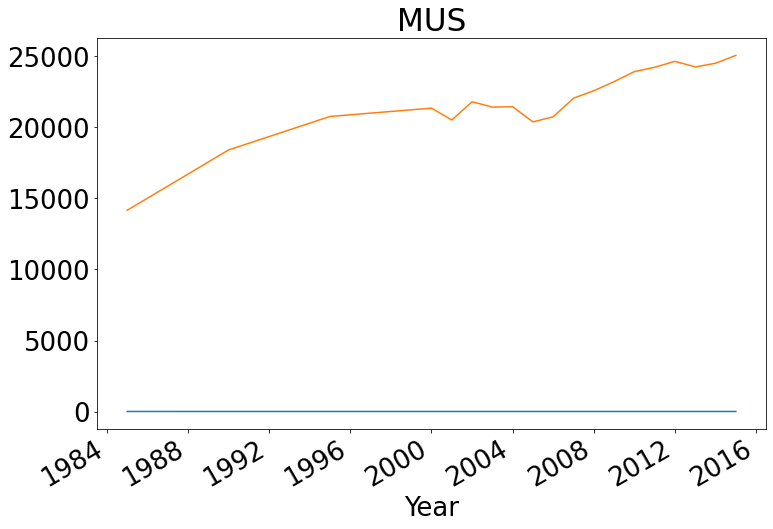

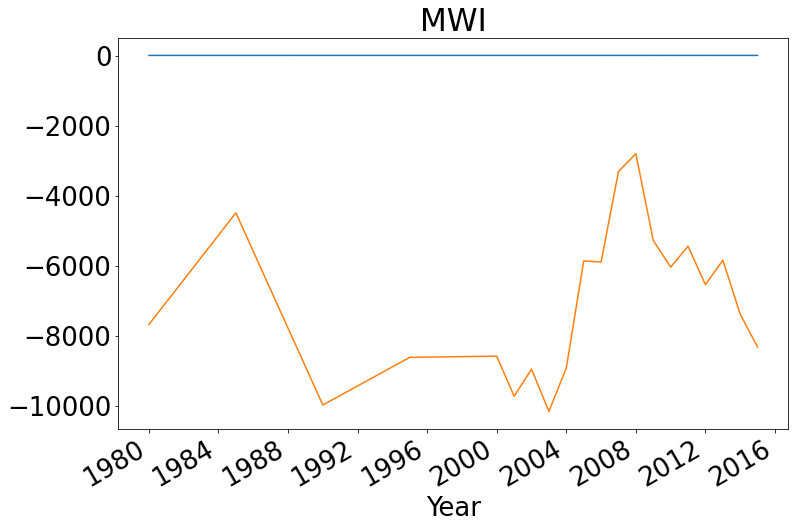

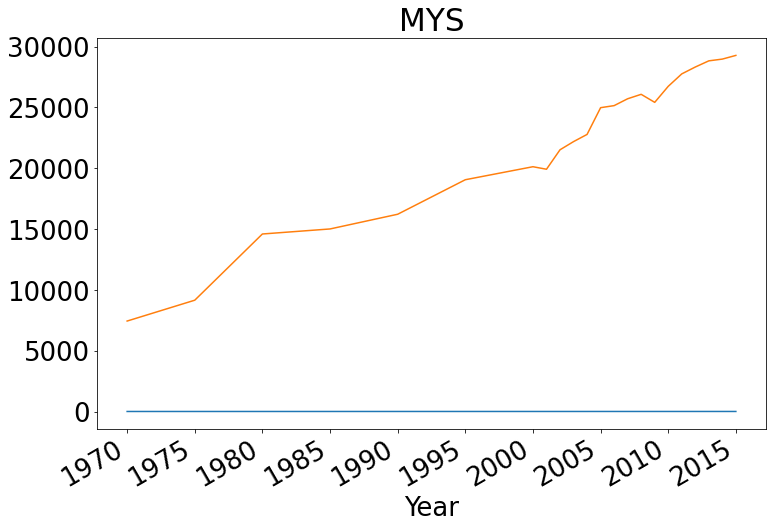

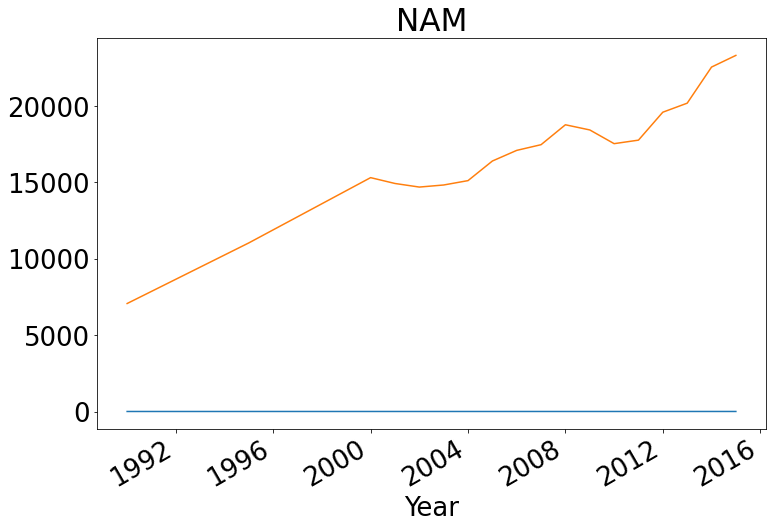

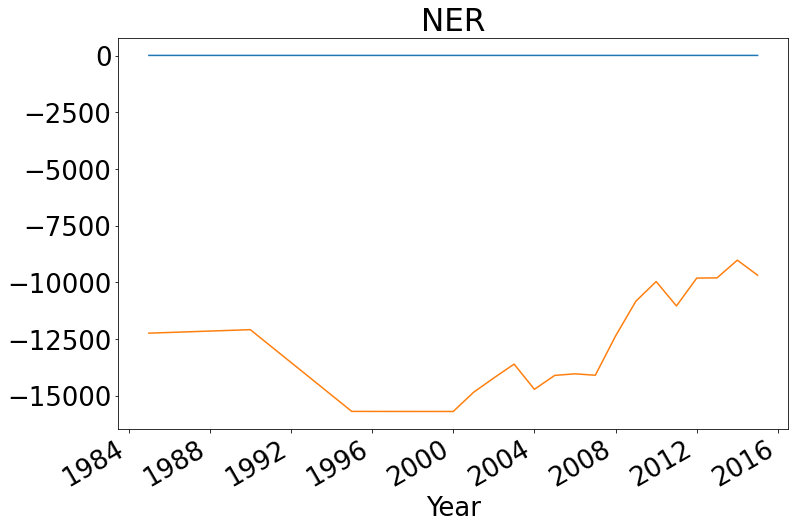

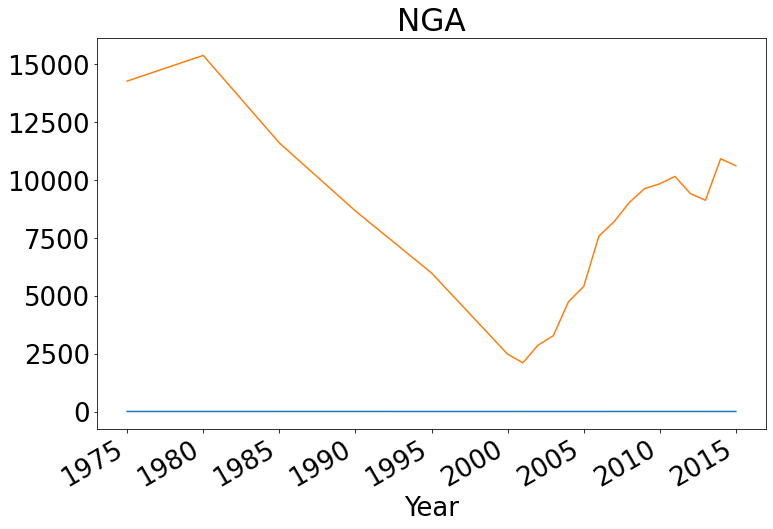

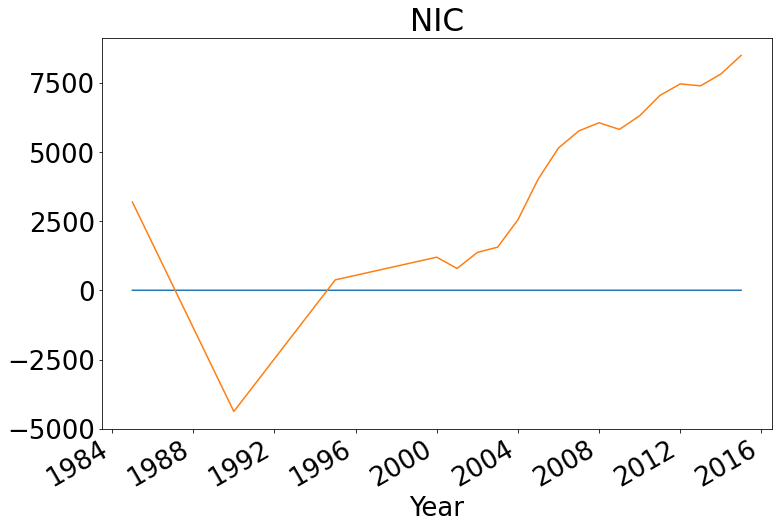

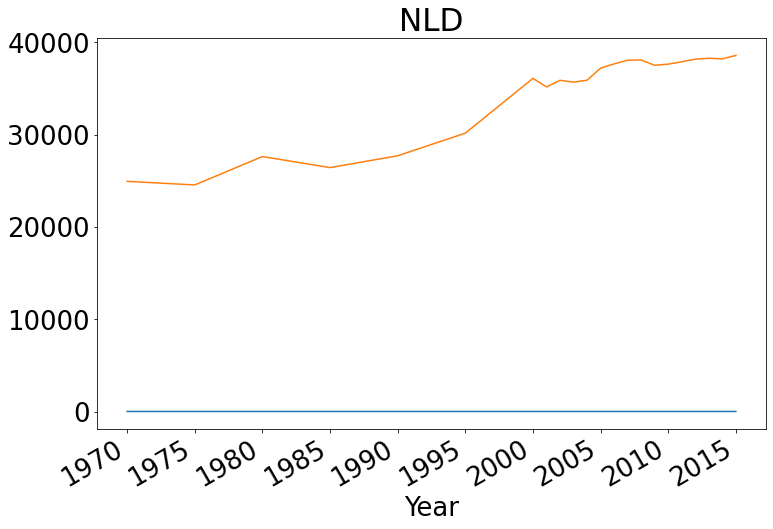

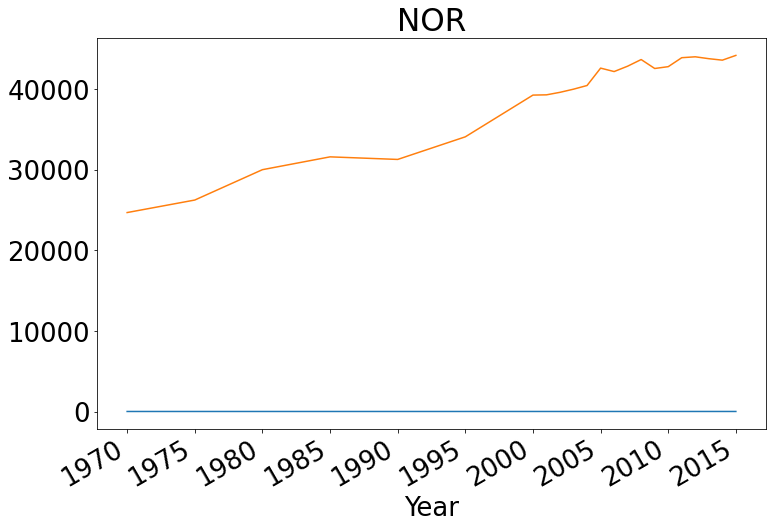

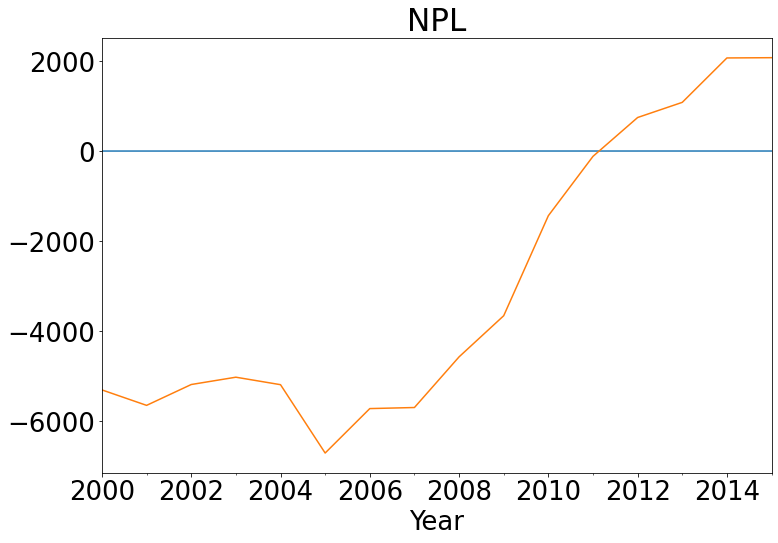

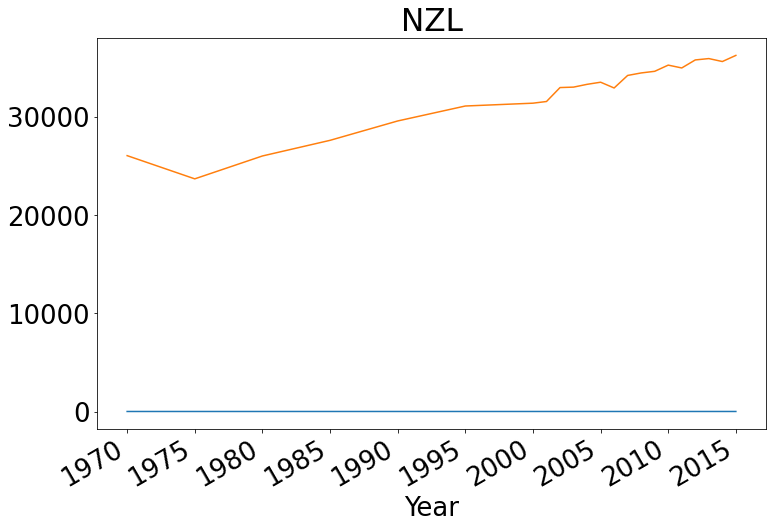

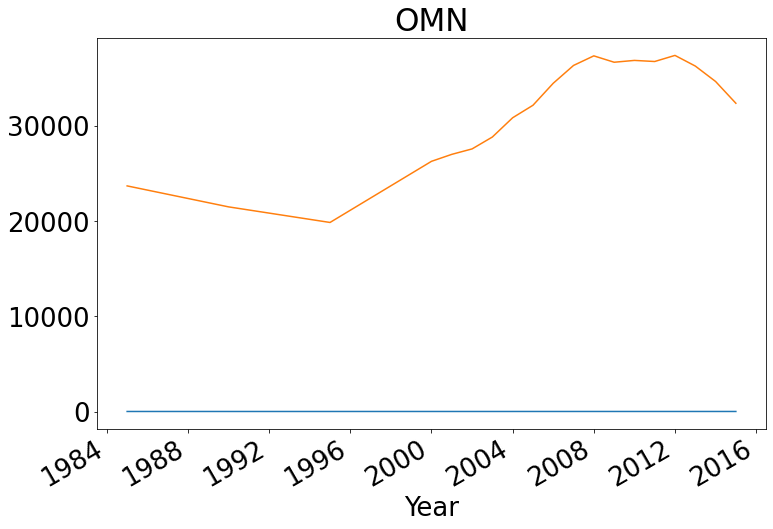

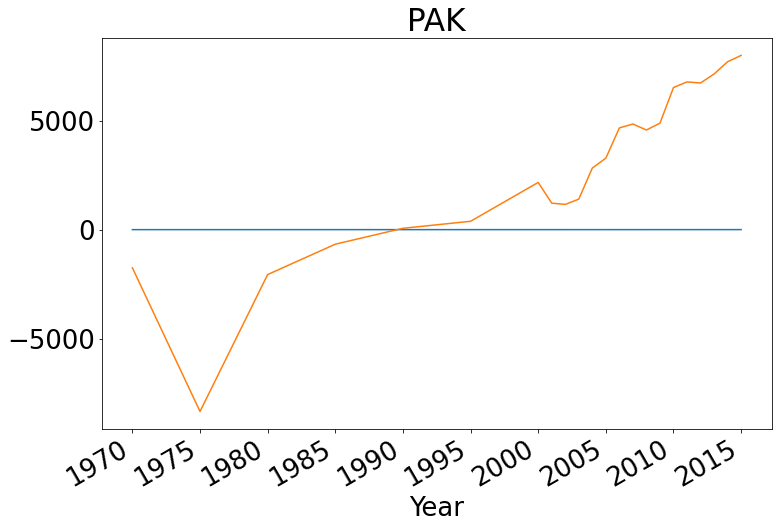

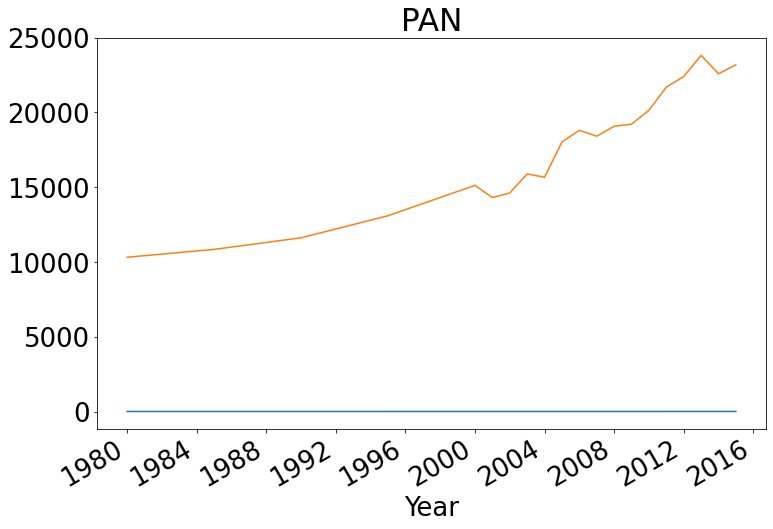

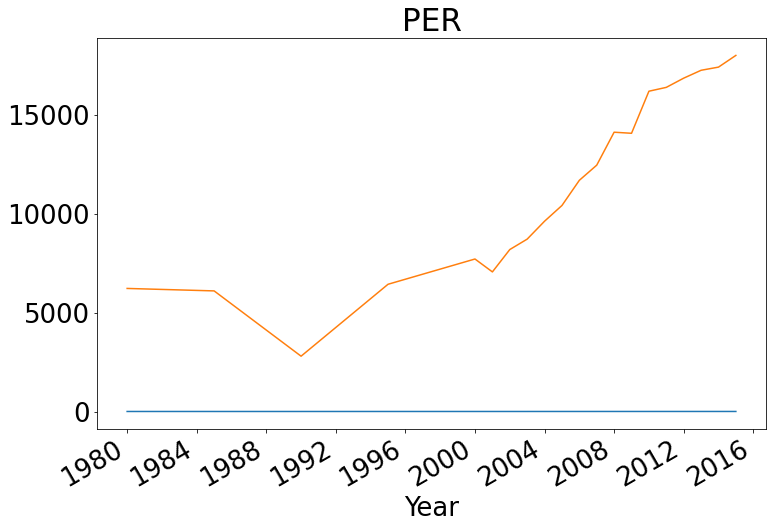

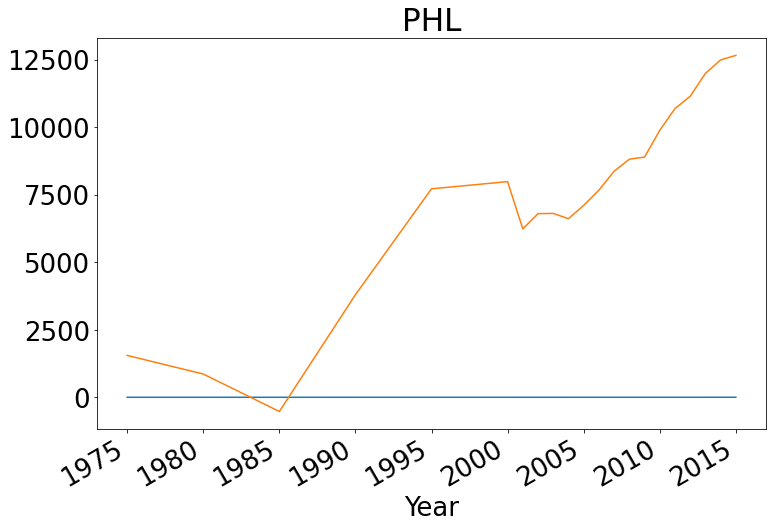

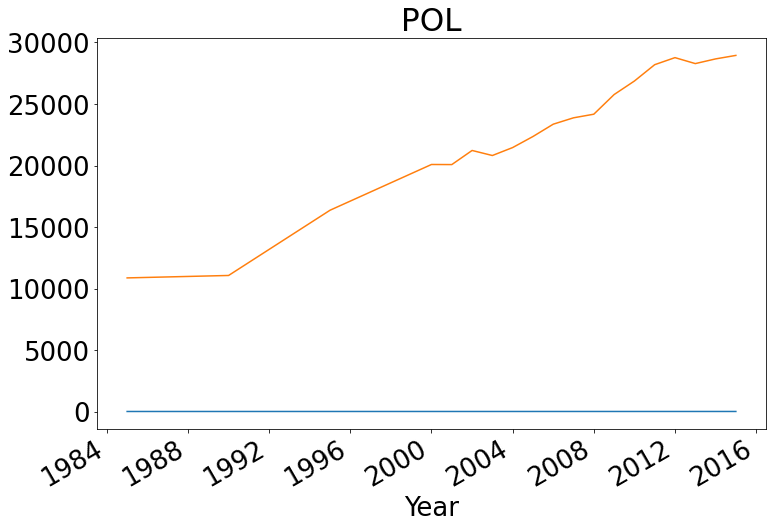

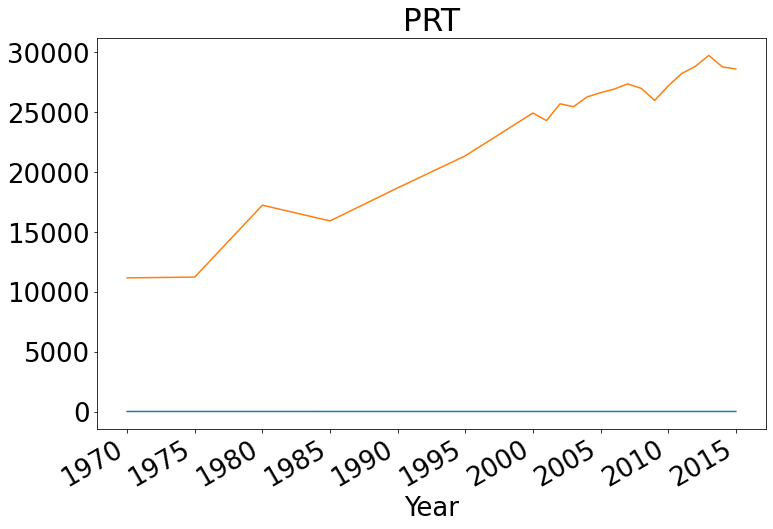

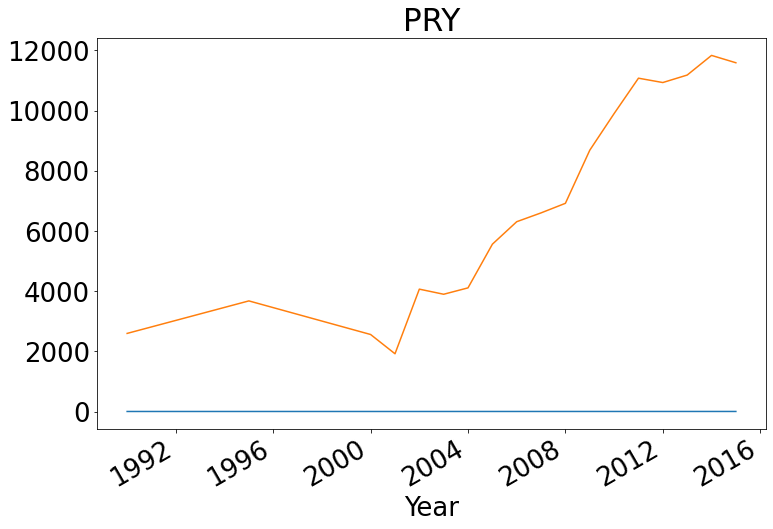

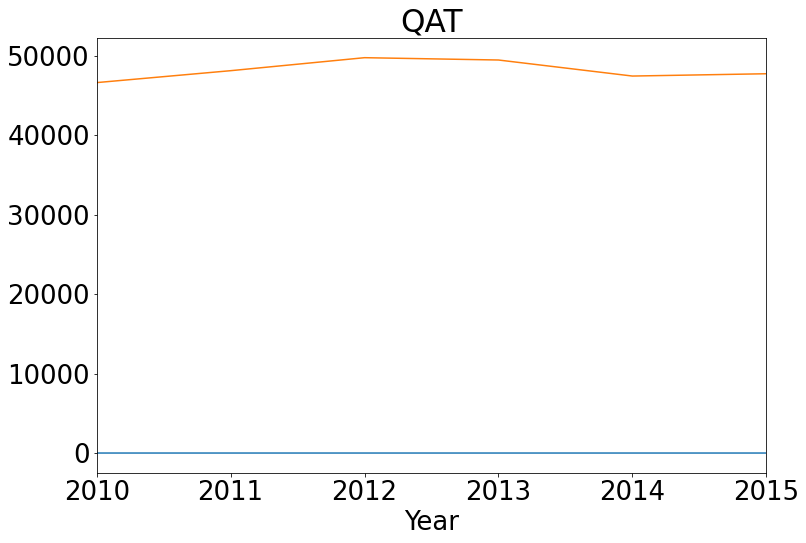

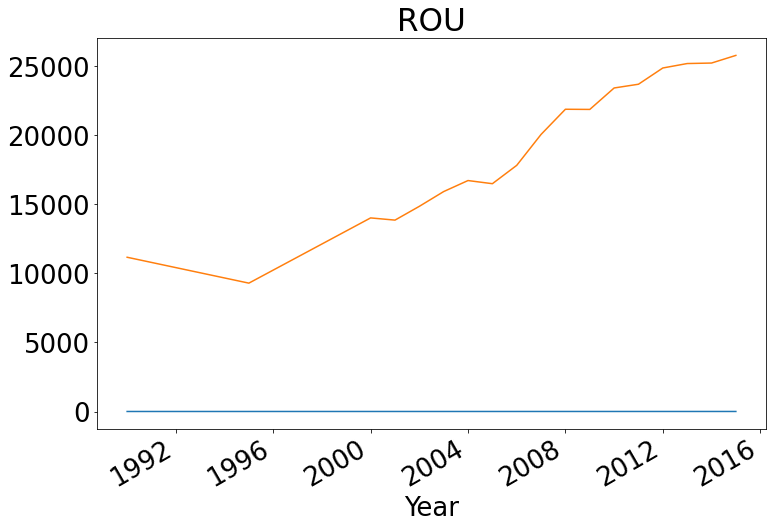

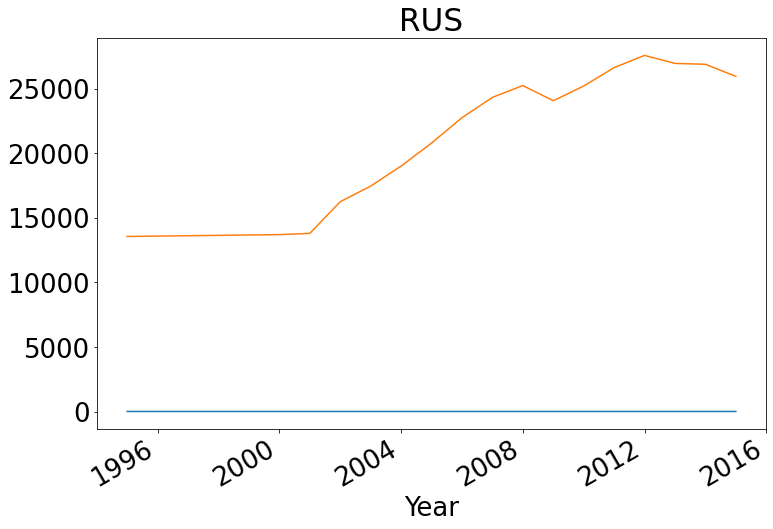

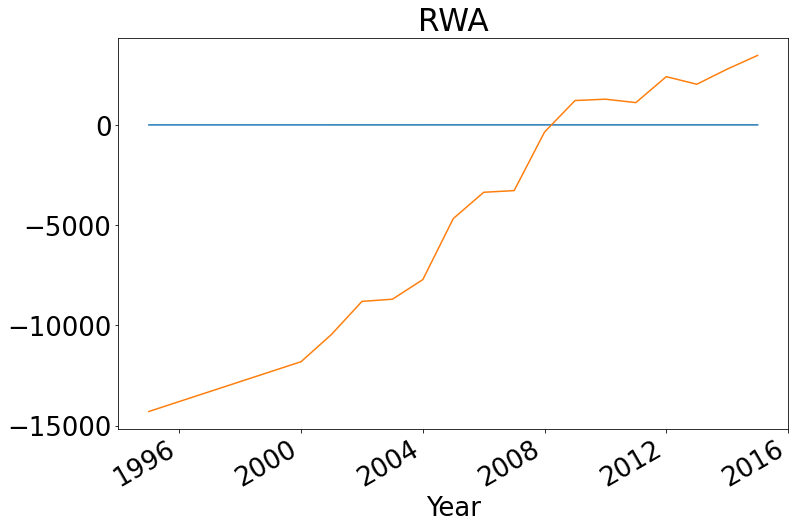

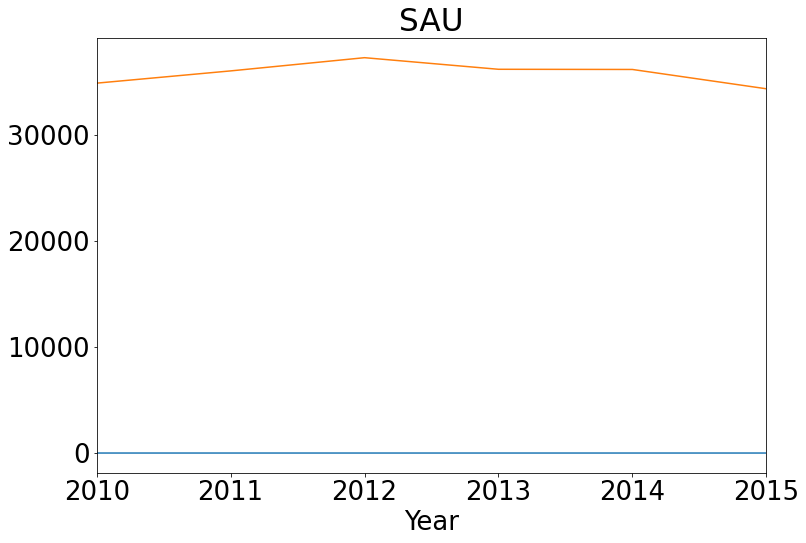

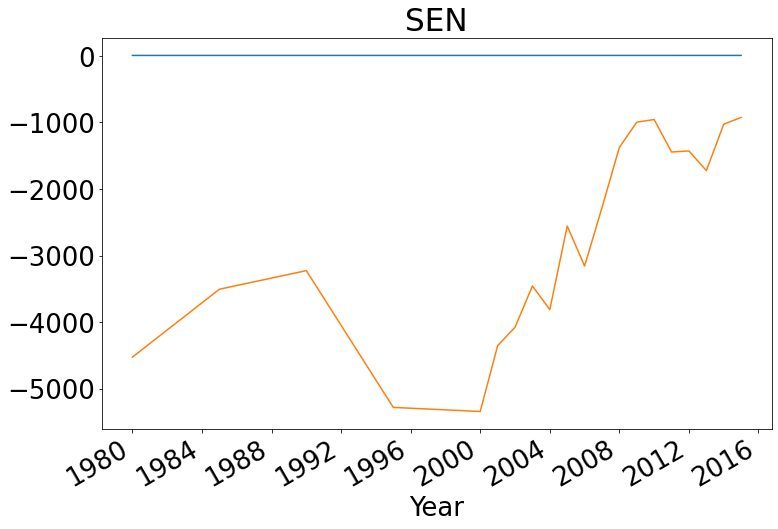

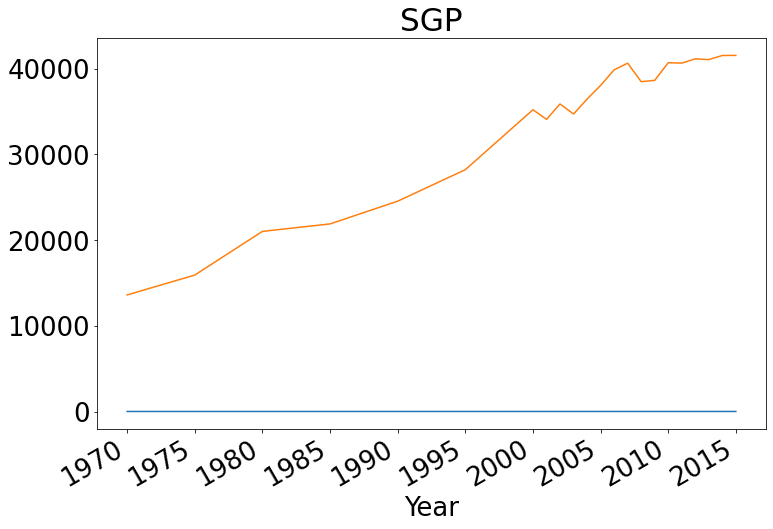

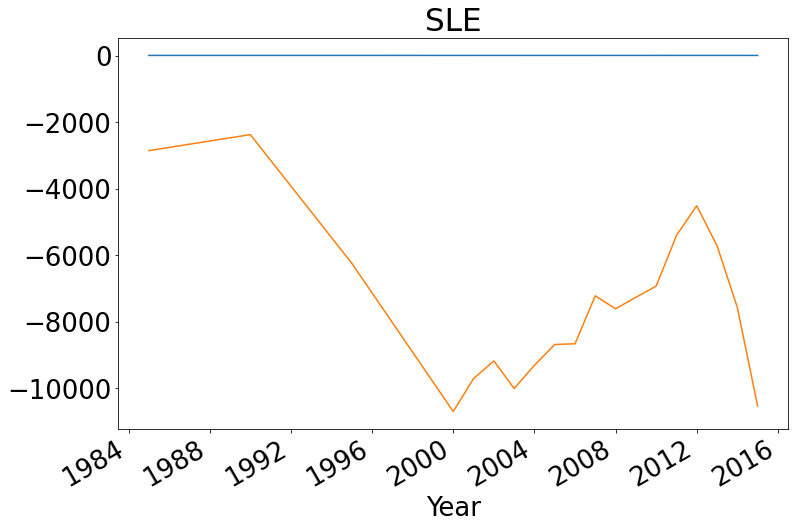

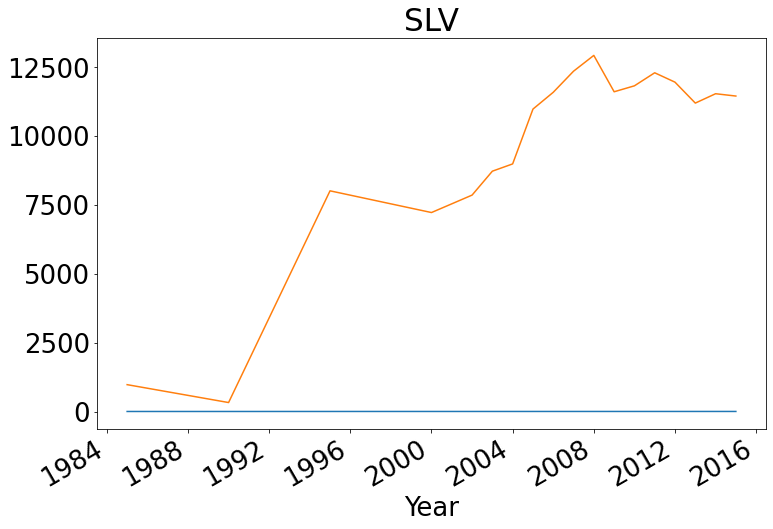

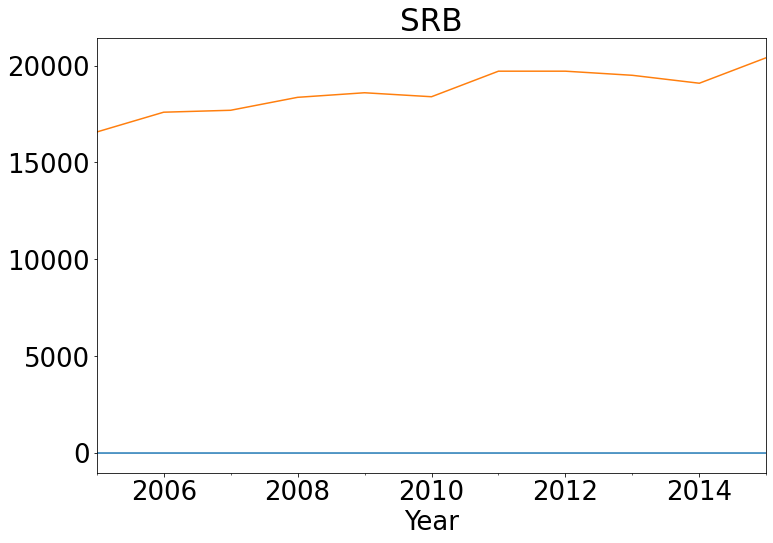

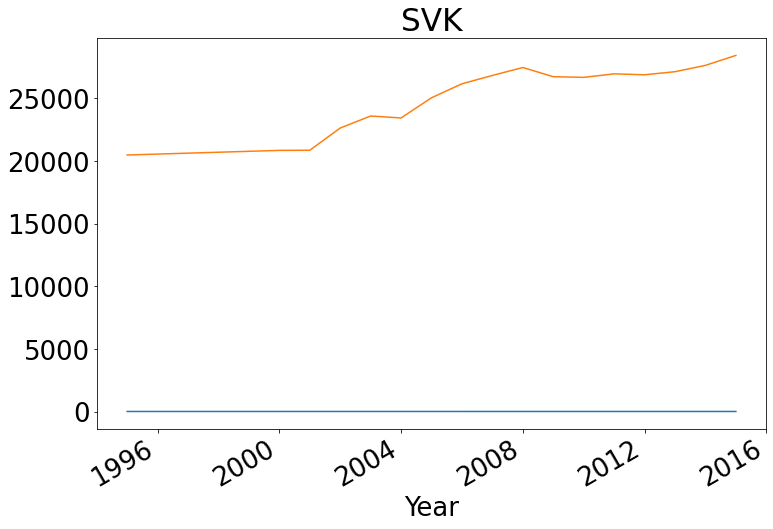

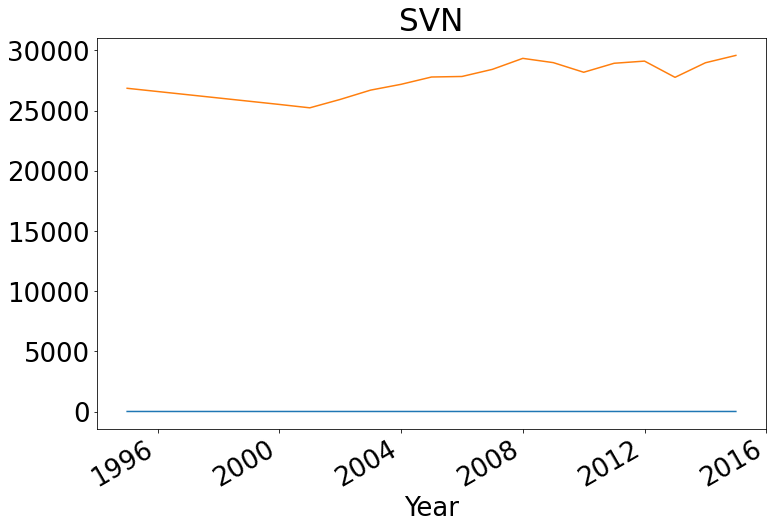

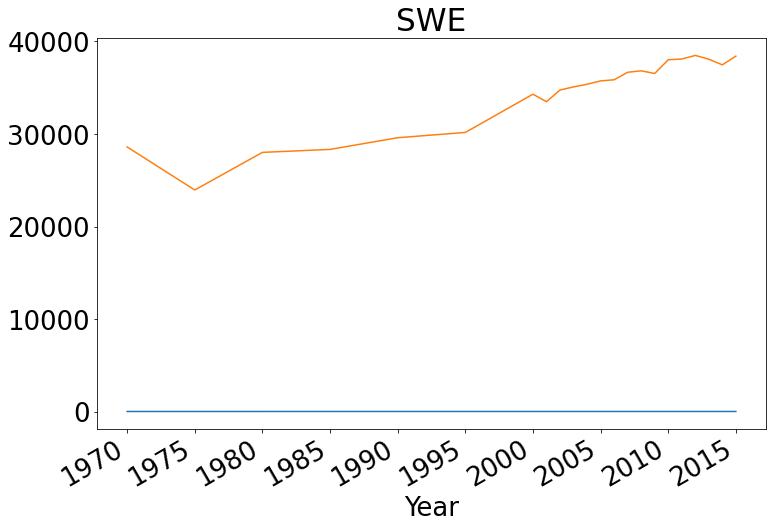

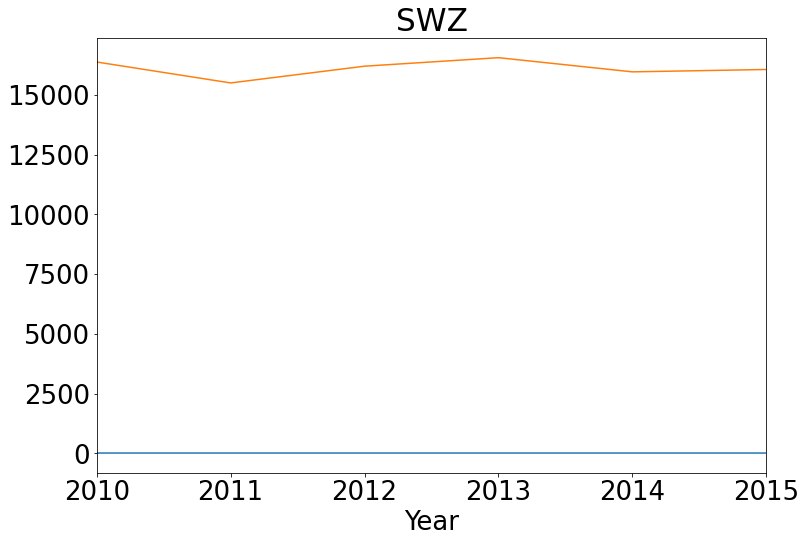

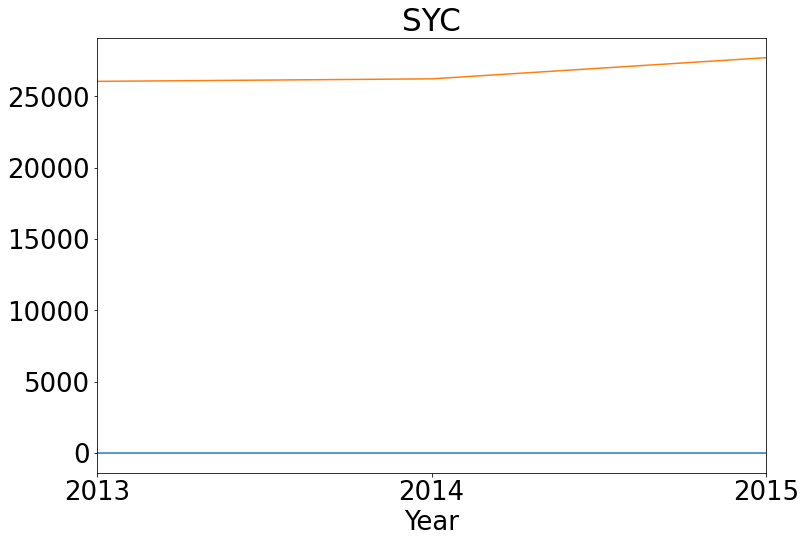

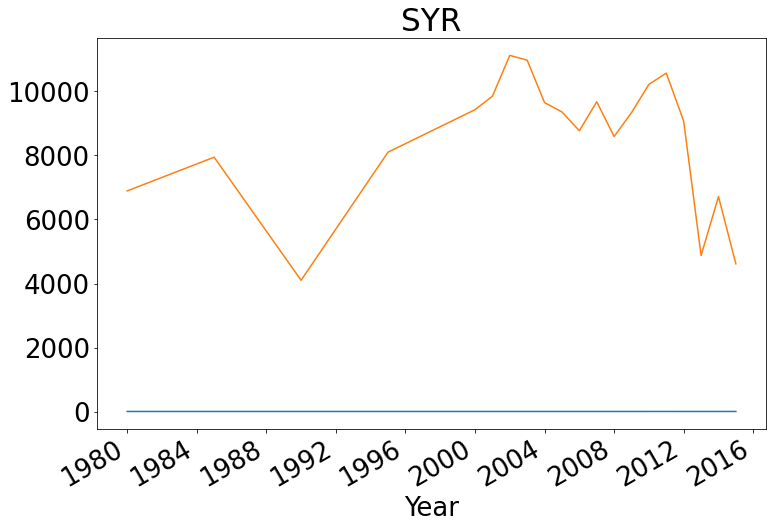

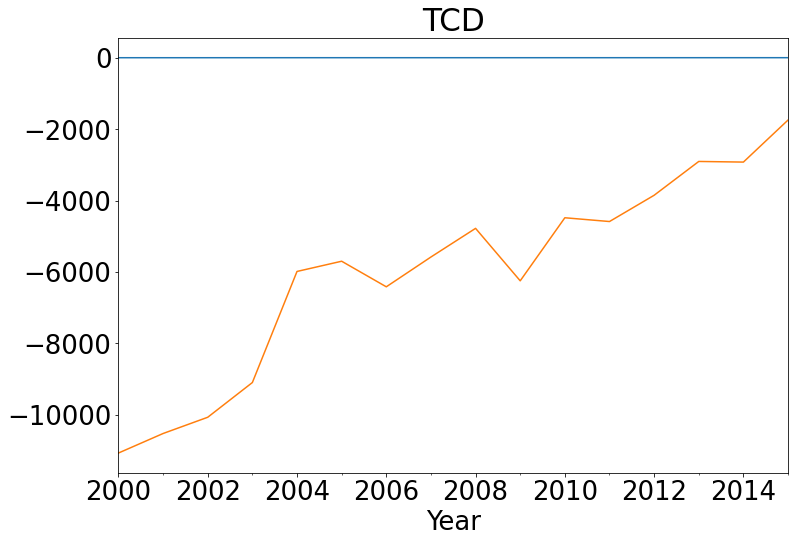

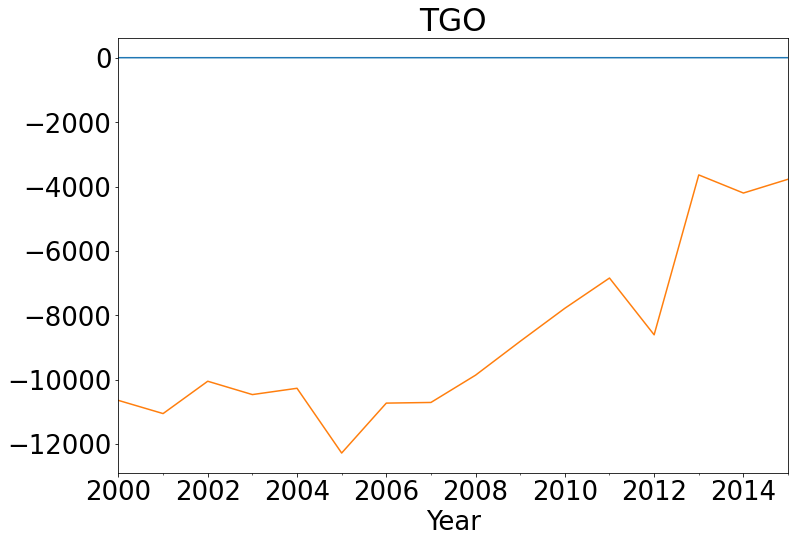

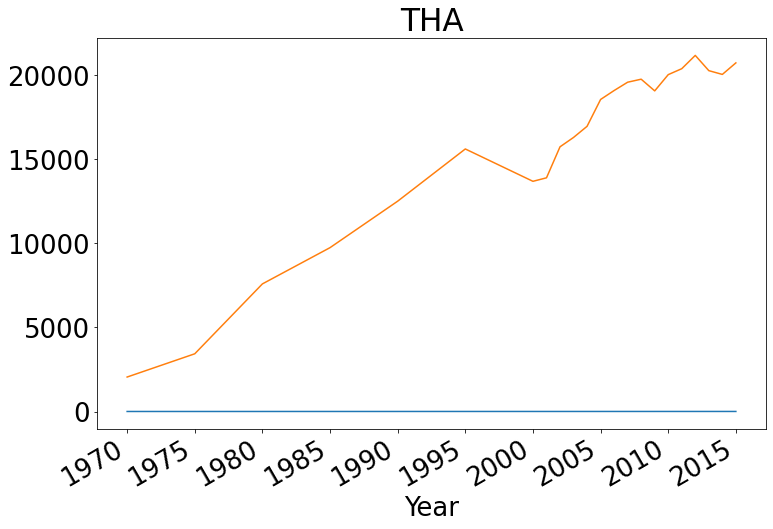

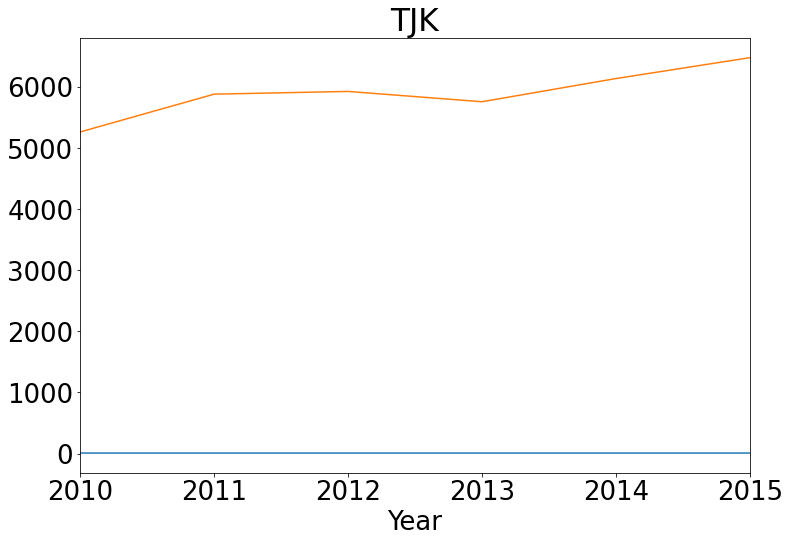

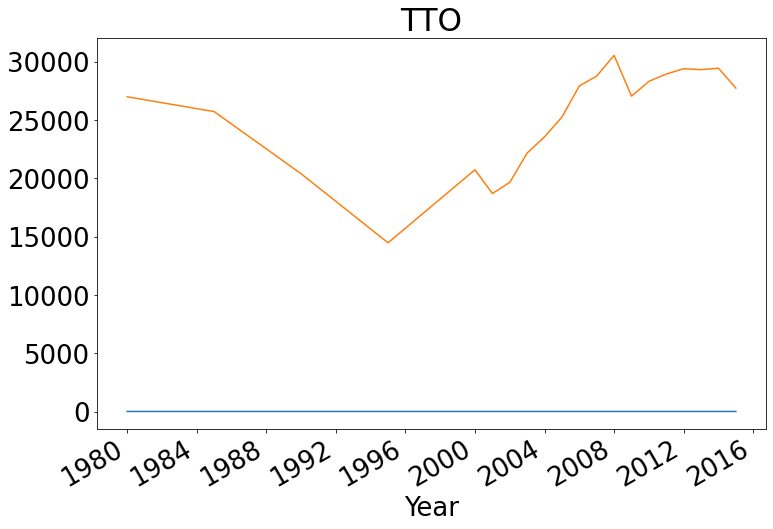

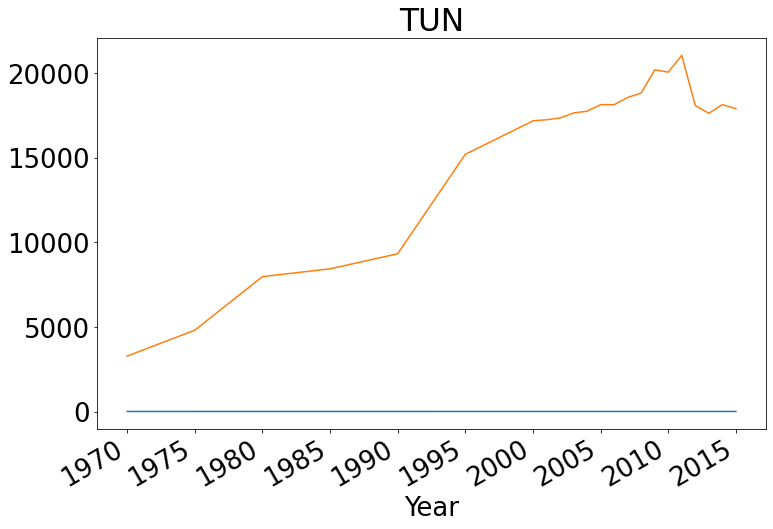

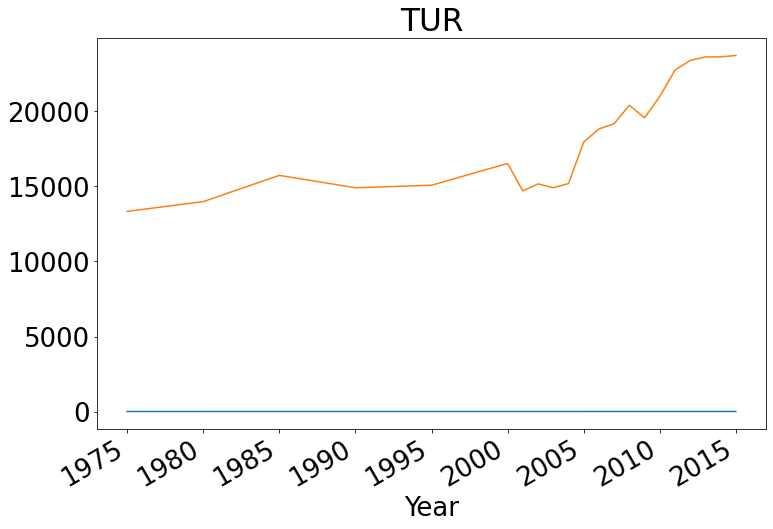

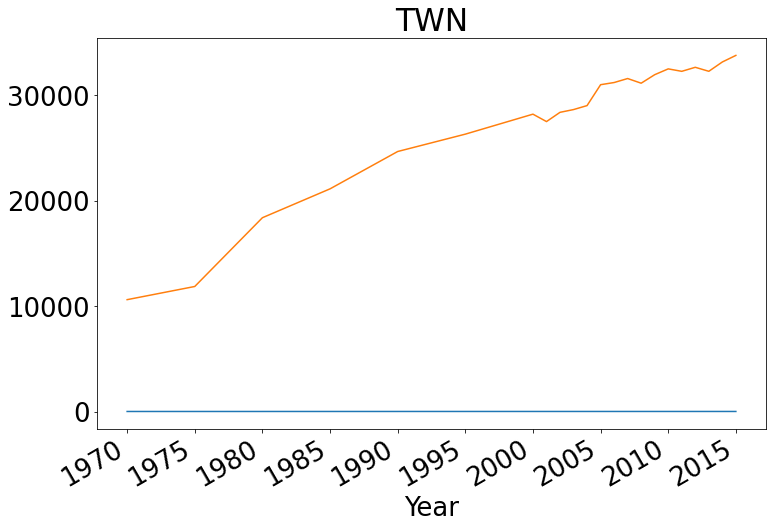

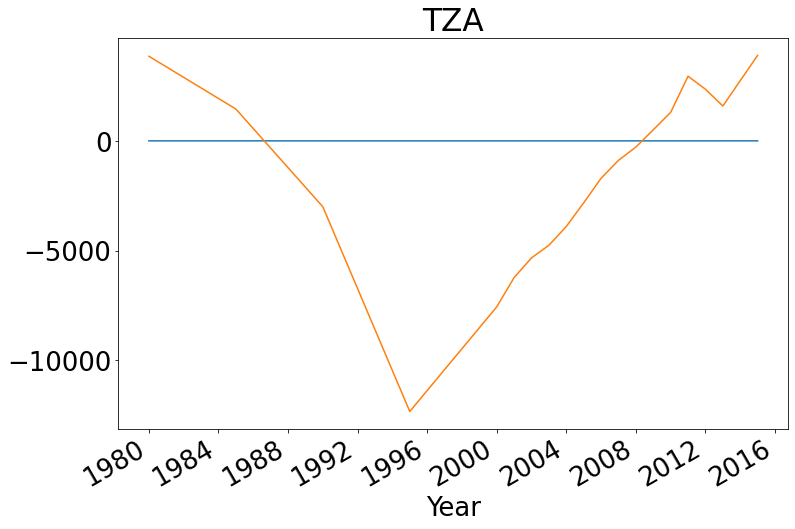

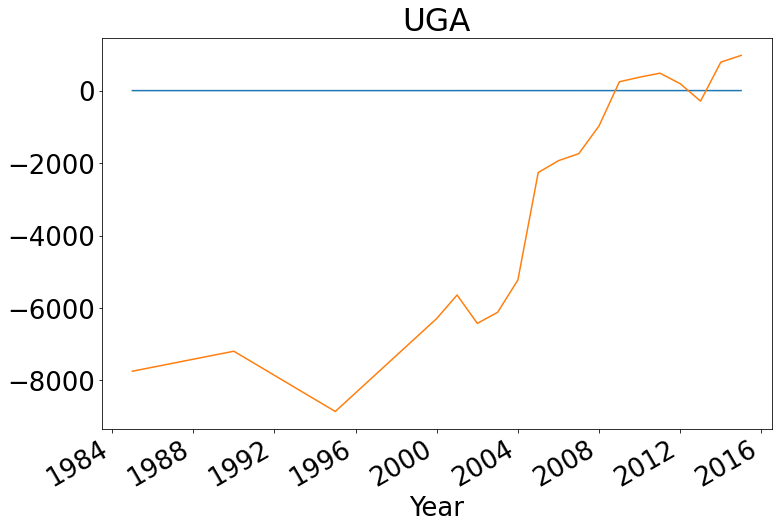

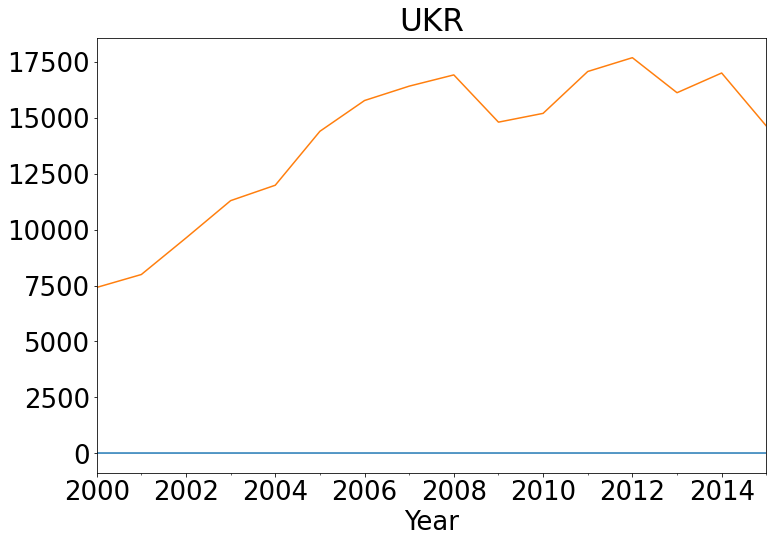

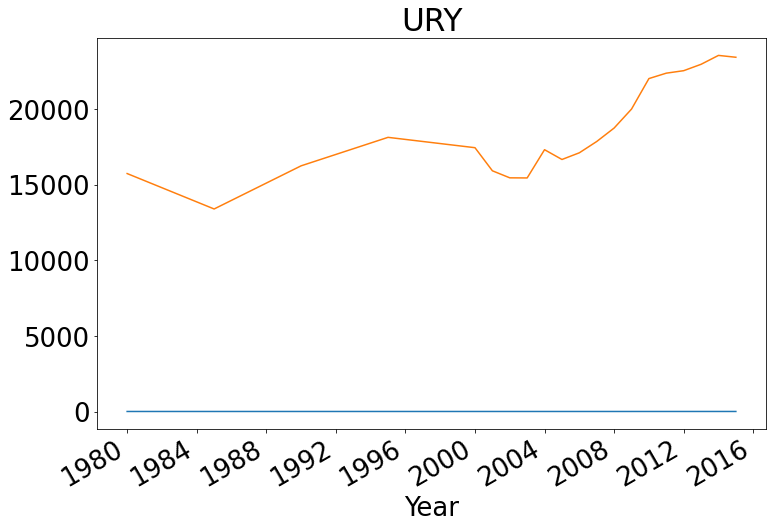

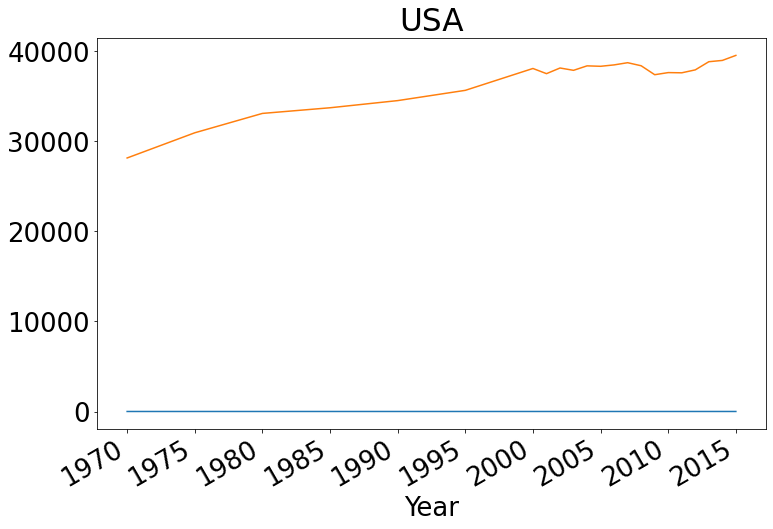

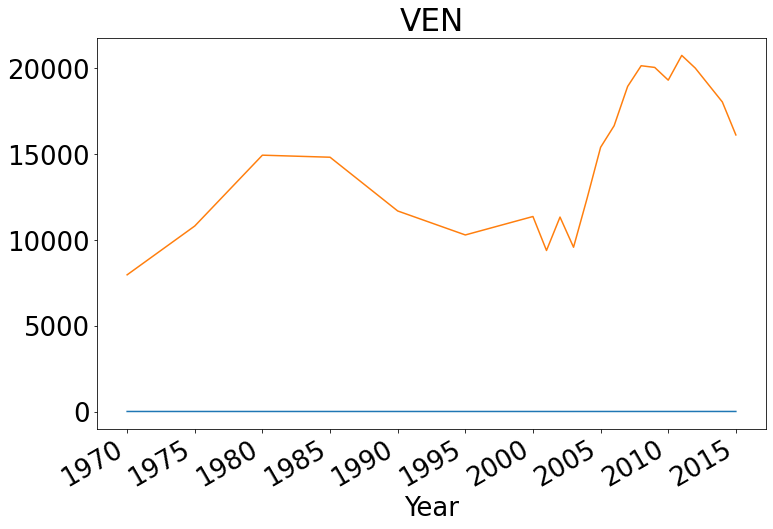

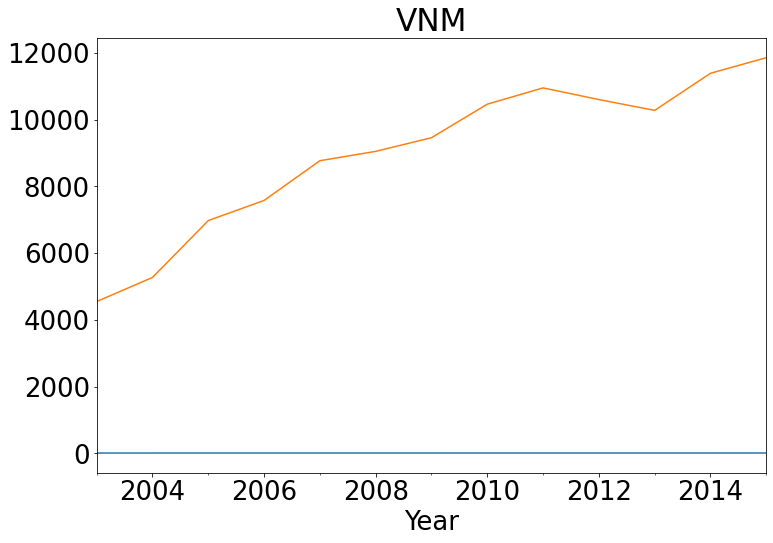

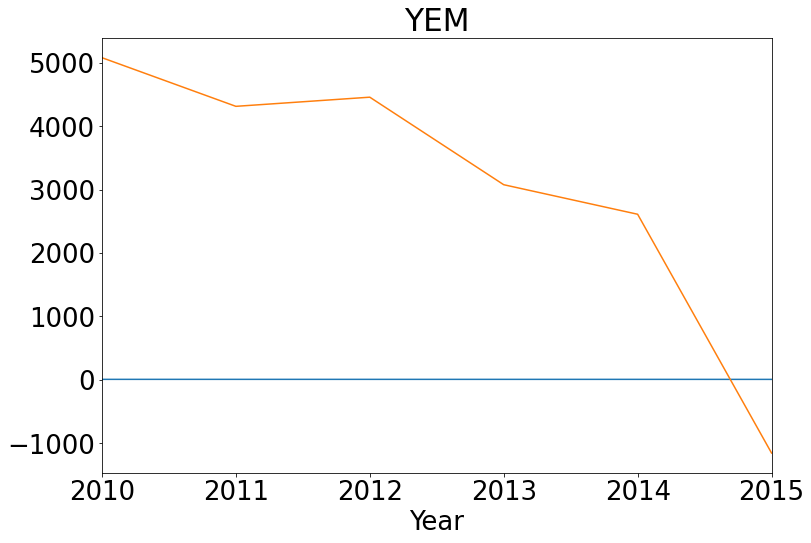

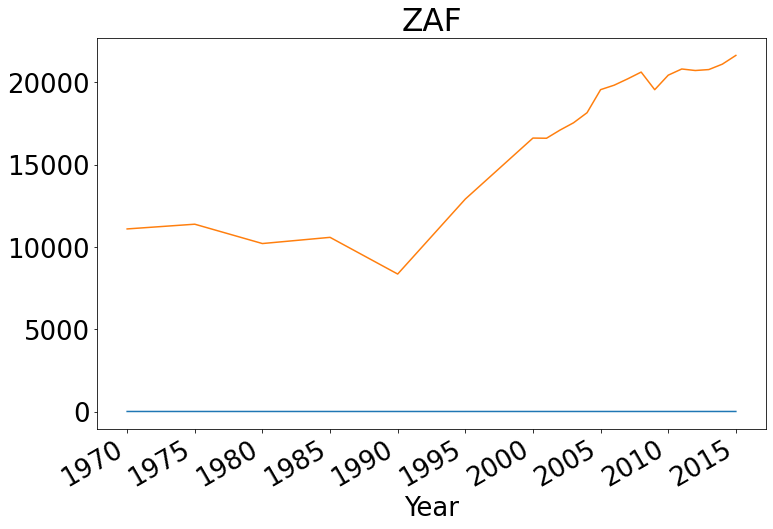

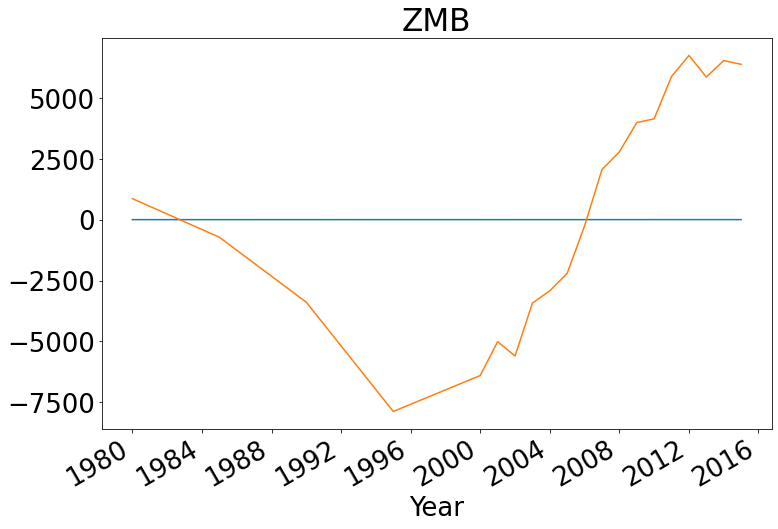

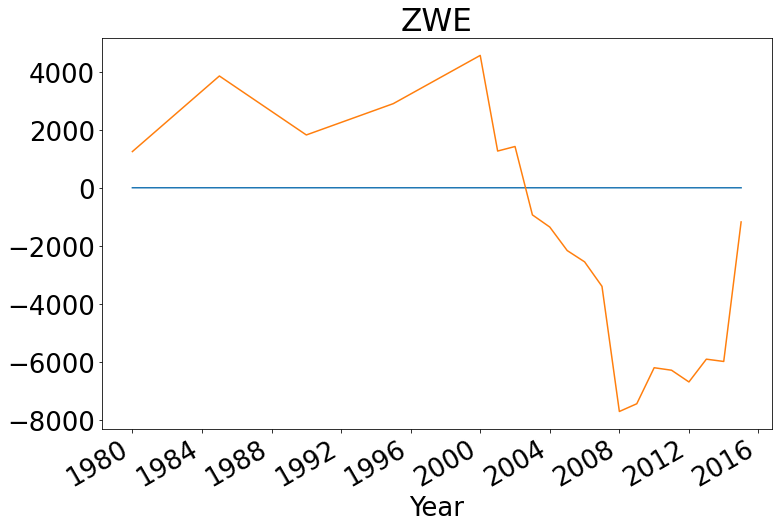

In [16]:
countries = reg_data.groupby("ISO_Code").mean().index
for country in countries:
    fig, ax = plt.subplots(figsize = (12,8))
    # Takes cumulative product
    reg_data[y_var + [y_var[0] + " Predictor"]].loc[country].plot.line(ax = ax,
                                                                      legend = False)
    ax.set_title(country)
    plt.show()
    plt.close()